## Problem Statement

Predict housing prices in Aimes Iowa by identifying the most effective predictors from the given housing dataset.  

## Executive Summary

This project is broken into two notebooks, the first notebook looks into Exploratory Data Analysis, Data Cleaning and Exploratory visualisations.

### Contents:
1. [Introduction and Executive Summary](#introduction)
2. [Dealing with null values](#paragraph1)
3. [Exploratory Data Analysis](#paragraph2)

[Data Dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)


### Data Import and Cleaning

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/Users/johnsmith/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('../datasets/train.csv', keep_default_na=False, dtype={'MS SubClass': np.object, 
                                                                           'Id' : np.object, 
                                                                           'PID': np.object})

In [3]:
train.head()

Id        PID MS SubClass MS Zoning Lot Frontage  Lot Area Street Alley  \
0  109  533352170          60        RL                  13517   Pave    NA   
1  544  531379050          60        RL           43     11492   Pave    NA   
2  153  535304180          20        RL           68      7922   Pave    NA   
3  318  916386060          60        RL           73      9802   Pave    NA   
4  255  906425045          50        RL           82     14235   Pave    NA   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0      NA    NA   
1       IR1          Lvl  ...            0         0      NA    NA   
2       Reg          Lvl  ...            0         0      NA    NA   
3       Reg          Lvl  ...            0         0      NA    NA   
4       IR1          Lvl  ...            0         0      NA    NA   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0           NA        0       3    2010        WD      130500  
1           NA        0       4    2009        WD      220000  
2           NA        0       1    2010        WD      109000  
3           NA        0       4    2010        WD      174000  
4           NA        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [4]:
train.shape

#missing one variable? 
#according to the kaggle doc = SIZE: 2930 observations, 82 variables
#but on kaggle challenge page, 81 variables is correct

(2051, 81)

In [5]:
train.isnull().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 81, dtype: int64

In [6]:
train.describe().transpose()

count           mean           std      min       25%  \
Lot Area         2051.0   10065.208191   6742.488909   1300.0    7500.0   
Overall Qual     2051.0       6.112140      1.426271      1.0       5.0   
Overall Cond     2051.0       5.562165      1.104497      1.0       5.0   
Year Built       2051.0    1971.708922     30.177889   1872.0    1953.5   
Year Remod/Add   2051.0    1984.190151     21.036250   1950.0    1964.5   
1st Flr SF       2051.0    1164.488055    396.446923    334.0     879.5   
2nd Flr SF       2051.0     329.329108    425.671046      0.0       0.0   
Low Qual Fin SF  2051.0       5.512921     51.068870      0.0       0.0   
Gr Liv Area      2051.0    1499.330083    500.447829    334.0    1129.0   
Full Bath        2051.0       1.577279      0.549279      0.0       1.0   
Half Bath        2051.0       0.371039      0.501043      0.0       0.0   
Bedroom AbvGr    2051.0       2.843491      0.826618      0.0       2.0   
Kitchen AbvGr    2051.0       1.042906      0.209790      0.0       1.0   
TotRms AbvGrd    2051.0       6.435885      1.560225      2.0       5.0   
Fireplaces       2051.0       0.590931      0.638516      0.0       0.0   
Wood Deck SF     2051.0      93.833740    128.549416      0.0       0.0   
Open Porch SF    2051.0      47.556802     66.747241      0.0       0.0   
Enclosed Porch   2051.0      22.571916     59.845110      0.0       0.0   
3Ssn Porch       2051.0       2.591419     25.229615      0.0       0.0   
Screen Porch     2051.0      16.511458     57.374204      0.0       0.0   
Pool Area        2051.0       2.397855     37.782570      0.0       0.0   
Misc Val         2051.0      51.574354    573.393985      0.0       0.0   
Mo Sold          2051.0       6.219893      2.744736      1.0       4.0   
Yr Sold          2051.0    2007.775719      1.312014   2006.0    2007.0   
SalePrice        2051.0  181469.701609  79258.659352  12789.0  129825.0   

                      50%       75%       max  
Lot Area           9430.0   11513.5  159000.0  
Overall Qual          6.0       7.0      10.0  
Overall Cond          5.0       6.0       9.0  
Year Built         1974.0    2001.0    2010.0  
Year Remod/Add     1993.0    2004.0    2010.0  
1st Flr SF         1093.0    1405.0    5095.0  
2nd Flr SF            0.0     692.5    1862.0  
Low Qual Fin SF       0.0       0.0    1064.0  
Gr Liv Area        1444.0    1728.5    5642.0  
Full Bath             2.0       2.0       4.0  
Half Bath             0.0       1.0       2.0  
Bedroom AbvGr         3.0       3.0       8.0  
Kitchen AbvGr         1.0       1.0       3.0  
TotRms AbvGrd         6.0       7.0      15.0  
Fireplaces            1.0       1.0       4.0  
Wood Deck SF          0.0     168.0    1424.0  
Open Porch SF        27.0      70.0     547.0  
Enclosed Porch        0.0       0.0     432.0  
3Ssn Porch            0.0       0.0     508.0  
Screen Porch          0.0       0.0     490.0  
Pool Area             0.0       0.0     800.0  
Misc Val              0.0       0.0   17000.0  
Mo Sold               6.0       8.0      12.0  
Yr Sold            2008.0    2009.0    2010.0  
SalePrice        162500.0  214000.0  611657.0

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               2051 non-null   object
 1   PID              2051 non-null   object
 2   MS SubClass      2051 non-null   object
 3   MS Zoning        2051 non-null   object
 4   Lot Frontage     2051 non-null   object
 5   Lot Area         2051 non-null   int64 
 6   Street           2051 non-null   object
 7   Alley            2051 non-null   object
 8   Lot Shape        2051 non-null   object
 9   Land Contour     2051 non-null   object
 10  Utilities        2051 non-null   object
 11  Lot Config       2051 non-null   object
 12  Land Slope       2051 non-null   object
 13  Neighborhood     2051 non-null   object
 14  Condition 1      2051 non-null   object
 15  Condition 2      2051 non-null   object
 16  Bldg Type        2051 non-null   object
 17  House Style      2051 non-null   

Sale Condition (Nominal): Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
Missing from dataset (looks like it was intentionally left off the kaggle)

### Dealing with Null Values <a name = "paragraph1"></a>
|Row|Column Name|Non-Null Values|Data Type|Variable Description|Comments|
|---|---|---|---|---|---|
|4|Lot Frontage (Continuous)|1721|float64|Linear feet of street connected to property|likely to be missing completely at random,Lot Frontage should be linked to Lot Config as the description in the data dictionary seems to fit, assigning the mean of each Lot Config category to the missing values of Lot Frontage in relevant Lot Config category but it does not look to be a good predictor for price
|7|Alley (Nominal)|140|object|Type of alley access to property|NA is a valid category and the data dictionary confirms this
|26|Mas Vnr Type((Nominal)|2029|object|Masonry veneer type|replacing the type to None and area to 0 since the the missing values are consistent between the two related variables and there are only 16 rows
|27|Mas Vnr Area (Continuous)|2029|float64|Masonry veneer area in square feet|replacing the type to None and area to 0 since the the missing values are consistent between the two related variables and there are only 16 rows
|31|Bsmt Qual ((Ordinal)|1996|object|Evaluates the height of the basement|NA is a valid category and the data dictionary confirms this
|32|Bsmt Cond(Ordinal)|1996|object|Evaluates the general condition of the basement|NA is a valid category and the data dictionary confirms this, rows where missing values are found should be similar as above
|33|Bsmt Exposure(Ordinal)|1993|object|Refers to walkout or garden level walls| Assigning the value of 'No' (no exposure) as the other variables indicate that a basement is present and might be unfinished, actual number of null values is 3 after further investigation
|34|BsmtFin Type 1((Ordinal)|1996|object|Rating of basement finished area|should be NA as a valid category instead of '' , corrected to NA as that indicates that no basement exists
|35|BsmtFin SF 1(Continuous)|2050|float64|Type 1 finished square feet|found one '' value, resolved by dropping row 1327
|36|BsmtFin Type 2(Ordinal)|1995|object|Rating of basement finished area (if multiple types)|found two '' values, might be dropping both, dropping row 1327
|37|BsmtFin SF 2(Continuous)|2050|float64|Type 2 finished square feet|found one '' value, similar to one of the values above, resolved by dropping row 1327
|38|Bsmt Unf SF (Continuous)|2050|float64|Unfinished square feet of basement area|found one '' value, similar to one of the values above, resolved by dropping row 1327
|39|Total Bsmt SF(Continuous)|2050|float64|Total square feet of basement area|found one '' value, similar to one of the values above, resolved by dropping row 1327
|48|Bsmt Full Bath (Discrete)|2049|float64|Basement full bathrooms|given that the rest of the basement stats indicate a basement may not exist at this property, reassigning a 0 value to this row
|49|Bsmt Half Bath (Discrete)|2049|float64|Basement half bathrooms|given that the rest of the basement stats indicate a basement may not exist at this property, reassigning a 0 value to this row
|58|Fireplace Qu (Ordinal)|1051|object|Fireplace quality|NA is a valid category and the data dictionary confirms this
|59|Garage Type (Nominal)|1938|object|Garage location|NA is a valid category and the data dictionary confirms this
|60|Garage Yr Blt (Discrete)|1937|float64|Year garage was built|assigning 0 value to allow satisfy int data type condition and to allow it to be used as a predictor 
|61|Garage Finish (Ordinal)|1937|object|Interior finish of the garage|found a '' value and dropping this row since there is only one row and i cannot reasonably deduce the missing values, also NA is a valid category and the data dictionary confirms this
|62|Garage Cars (Discrete)|2050|float64|Size of garage in car capacity|found a '' value and dropping this row since there is only one row and i cannot reasonably deduce the missing values and changed to int64
|63|Garage Area (Continuous)|2050|float64|Size of garage in square feet|found a '' value and dropping this row since there is only one row and i cannot reasonably deduce the missing values and changed to int64
|64|Garage Qual (Ordinal)|1937|object|Garage quality|found a '' value and dropping this row since there is only one row and i cannot reasonably deduce the missing values
|65|Garage Cond (Ordinal)|1937|object|Garage condition|found a '' value and dropping this row since there is only one row and i cannot reasonably deduce the missing values
|73|Pool QC (Ordinal)|9|object|Pool quality|NA is a valid category and the data dictionary confirms this
|74|Fence (Ordinal)|400|object|Fence quality|NA is a valid category and the data dictionary confirms this
|75|Misc Feature (Continuous)|65|object|$Value of miscellaneous feature|NA is a valid category and the data dictionary confirms this
 

After the first import of the train dataset, we found that some NA values were categorised incorrectly as null values and so the table above served as a guide to address the issue of null values and to ascertain if it was due to wrong categorisation or it was indeed missing values in those columns. 

In [8]:
#Splitting the data into data types to aid in EDA and data cleaning 
#first use categorical to house the transfers from numerical and continuous then concat to a single dataframe

In [9]:
draft_categorical = train.select_dtypes(include=['object'])
draft_categorical.head()

Id        PID MS SubClass MS Zoning Lot Frontage Street Alley Lot Shape  \
0  109  533352170          60        RL                Pave    NA       IR1   
1  544  531379050          60        RL           43   Pave    NA       IR1   
2  153  535304180          20        RL           68   Pave    NA       Reg   
3  318  916386060          60        RL           73   Pave    NA       Reg   
4  255  906425045          50        RL           82   Pave    NA       IR1   

  Land Contour Utilities  ... Garage Finish Garage Cars Garage Area  \
0          Lvl    AllPub  ...           RFn           2         475   
1          Lvl    AllPub  ...           RFn           2         559   
2          Lvl    AllPub  ...           Unf           1         246   
3          Lvl    AllPub  ...           Fin           2         400   
4          Lvl    AllPub  ...           Unf           2         484   

  Garage Qual Garage Cond Paved Drive Pool QC Fence Misc Feature Sale Type  
0          TA          TA           Y      NA    NA           NA       WD   
1          TA          TA           Y      NA    NA           NA       WD   
2          TA          TA           Y      NA    NA           NA       WD   
3          TA          TA           Y      NA    NA           NA       WD   
4          TA          TA           N      NA    NA           NA       WD   

[5 rows x 56 columns]

In [10]:
draft_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              2051 non-null   object
 1   PID             2051 non-null   object
 2   MS SubClass     2051 non-null   object
 3   MS Zoning       2051 non-null   object
 4   Lot Frontage    2051 non-null   object
 5   Street          2051 non-null   object
 6   Alley           2051 non-null   object
 7   Lot Shape       2051 non-null   object
 8   Land Contour    2051 non-null   object
 9   Utilities       2051 non-null   object
 10  Lot Config      2051 non-null   object
 11  Land Slope      2051 non-null   object
 12  Neighborhood    2051 non-null   object
 13  Condition 1     2051 non-null   object
 14  Condition 2     2051 non-null   object
 15  Bldg Type       2051 non-null   object
 16  House Style     2051 non-null   object
 17  Roof Style      2051 non-null   object
 18  Roof Mat

In [11]:
pd.options.display.max_rows = 80

Create a table here to track my progress on dealing with null values but found that the missing values in categorical data were not picked up by pandas default null checkers (as I had toggled it off in order to address the incorrect categorisation as null that pandas's default null checker had done). And I found it helpful to have the comparision between the two imported CSV info functions to narrow down the data clean up to columns of interest.

In [12]:
categorical_stats = pd.DataFrame(columns =['column', 'values', 'count_repeated_values', 'count_unique values', 
                                    'num_miss', 'percentage_miss'])

df = pd.DataFrame()

for c in draft_categorical.columns:
    df['column'] = [c]
    df['values'] = [draft_categorical[c].unique()]
    df['count_repeated_values'] = len(list(draft_categorical[c].unique()))
    df['count_unique values'] = int(draft_categorical[c].nunique())
    df['num_miss'] = draft_categorical[c].isnull().sum()
    df['percentage_miss'] = (draft_categorical[c].isnull().sum()/ len(draft_categorical)).round(3)*100
    categorical_stats = categorical_stats.append(df)
    
categorical_stats

column                                             values  \
0              Id  [109, 544, 153, 318, 255, 138, 2827, 145, 1942...   
0             PID  [533352170, 531379050, 535304180, 916386060, 9...   
0     MS SubClass  [60, 20, 50, 180, 160, 70, 120, 190, 85, 30, 9...   
0       MS Zoning        [RL, RM, FV, C (all), A (agr), RH, I (all)]   
0    Lot Frontage  [, 43, 68, 73, 82, 137, 35, 70, 21, 64, 120, 2...   
0          Street                                       [Pave, Grvl]   
0           Alley                                   [NA, Pave, Grvl]   
0       Lot Shape                               [IR1, Reg, IR2, IR3]   
0    Land Contour                               [Lvl, HLS, Bnk, Low]   
0       Utilities                           [AllPub, NoSeWa, NoSewr]   
0      Lot Config                [CulDSac, Inside, Corner, FR2, FR3]   
0      Land Slope                                    [Gtl, Sev, Mod]   
0    Neighborhood  [Sawyer, SawyerW, NAmes, Timber, Edwards, OldT...   
0     Condition 1  [RRAe, Norm, PosA, Artery, Feedr, PosN, RRAn, ...   
0     Condition 2  [Norm, RRNn, Feedr, Artery, PosA, PosN, RRAe, ...   
0       Bldg Type              [1Fam, TwnhsE, Twnhs, 2fmCon, Duplex]   
0     House Style  [2Story, 1Story, 1.5Fin, SFoyer, SLvl, 2.5Unf,...   
0      Roof Style         [Gable, Hip, Flat, Mansard, Shed, Gambrel]   
0       Roof Matl  [CompShg, WdShngl, Tar&Grv, WdShake, Membran, ...   
0    Exterior 1st  [HdBoard, VinylSd, Wd Sdng, BrkFace, Plywood, ...   
0    Exterior 2nd  [Plywood, VinylSd, Wd Sdng, HdBoard, MetalSd, ...   
0    Mas Vnr Type                   [BrkFace, None, , Stone, BrkCmn]   
0    Mas Vnr Area  [289, 132, 0, 82, 180, 192, 232, 456, 148, , 3...   
0      Exter Qual                                   [Gd, TA, Ex, Fa]   
0      Exter Cond                               [TA, Gd, Fa, Ex, Po]   
0      Foundation         [CBlock, PConc, BrkTil, Slab, Stone, Wood]   
0       Bsmt Qual                         [TA, Gd, Fa, NA, Ex, , Po]   
0       Bsmt Cond                         [TA, Gd, NA, Fa, Po, Ex, ]   
0   Bsmt Exposure                             [No, Gd, Av, NA, Mn, ]   
0  BsmtFin Type 1               [GLQ, Unf, ALQ, Rec, NA, BLQ, LwQ, ]   
0    BsmtFin SF 1  [533, 637, 731, 0, 247, 547, 1000, 292, 650, 3...   
0  BsmtFin Type 2               [Unf, Rec, NA, BLQ, GLQ, LwQ, ALQ, ]   
0    BsmtFin SF 2  [0, 713, 117, 1057, 173, 290, 420, 469, 42, 95...   
0     Bsmt Unf SF  [192, 276, 326, 384, 676, 557, 0, 188, 632, 39...   
0   Total Bsmt SF  [725, 913, 1057, 384, 676, 1517, 547, 1188, 92...   
0         Heating                     [GasA, GasW, Grav, Wall, OthW]   
0      Heating QC                               [Ex, TA, Gd, Fa, Po]   
0     Central Air                                             [Y, N]   
0      Electrical                  [SBrkr, FuseF, FuseA, FuseP, Mix]   
0  Bsmt Full Bath                                     [0, 1, 2, , 3]   
0  Bsmt Half Bath                                        [0, 1, , 2]   
0    Kitchen Qual                                   [Gd, TA, Fa, Ex]   
0      Functional       [Typ, Mod, Min2, Maj1, Min1, Sev, Sal, Maj2]   
0    Fireplace Qu                           [NA, TA, Gd, Po, Ex, Fa]   
0     Garage Type  [Attchd, Detchd, BuiltIn, Basment, NA, 2Types,...   
0   Garage Yr Blt  [1976, 1997, 1953, 2007, 1957, 1966, 2005, 195...   
0   Garage Finish                              [RFn, Unf, Fin, NA, ]   
0     Garage Cars                               [2, 1, 3, 0, 4, 5, ]   
0     Garage Area  [475, 559, 246, 400, 484, 578, 525, 531, 420, ...   
0     Garage Qual                         [TA, Fa, NA, Gd, Ex, Po, ]   
0     Garage Cond                         [TA, Fa, NA, Po, Gd, Ex, ]   
0     Paved Drive                                          [Y, N, P]   
0         Pool QC                               [NA, Fa, Gd, Ex, TA]   
0           Fence                     [NA, MnPrv, GdPrv, GdWo, MnWw]   
0    Misc Feature                 [NA, Shed, TenC, 

In [13]:
train.loc[train['Lot Frontage']=='']

Id        PID MS SubClass MS Zoning Lot Frontage  Lot Area Street  \
0      109  533352170          60        RL                  13517   Pave   
7      145  535154050          20        RL                  12160   Pave   
8     1942  535353130          20        RL                  15783   Pave   
23      12  527165230          20        RL                   7980   Pave   
27    1534  909277040          50        RL                  11700   Pave   
...    ...        ...         ...       ...          ...       ...    ...   
2016   560  532376110          20        RL                   7791   Pave   
2022  2872  909475020          20        RL                  16381   Pave   
2028  2526  534127190          20        RL                  20781   Pave   
2031    25  527402250          20        RL                  12537   Pave   
2047   785  905377130          30        RL                  12342   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC  Fence  \
0       NA       IR1          Lvl  ...            0         0      NA     NA   
7       NA       IR1          Lvl  ...            0         0      NA  MnPrv   
8       NA       Reg          Lvl  ...            0         0      NA  MnPrv   
23      NA       IR1          Lvl  ...            0         0      NA  GdPrv   
27    Grvl       IR1          HLS  ...            0         0      NA     NA   
...    ...       ...          ...  ...          ...       ...     ...    ...   
2016    NA       IR1          Lvl  ...            0         0      NA   GdWo   
2022    NA       IR1          Lvl  ...            0         0      NA     NA   
2028    NA       IR2          Lvl  ...            0         0      NA     NA   
2031    NA       IR1          Lvl  ...            0         0      NA     NA   
2047    NA       IR1          Lvl  ...            0         0      NA     NA   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0              NA        0       3    2010        WD      130500  
7              NA        0       5    2010        COD     142000  
8            Shed      400       6    2007        WD      112500  
23           Shed      500       3    2010        WD      185000  
27             NA        0       7    2008        WD      198000  
...           ...      ...     ...     ...        ...        ...  
2016           NA        0      10    2009        WD      129000  
2022           NA        0      12    2006        WD      223000  
2028           NA        0       6    2006        WD      262500  
2031           NA        0       4    2010        WD      149900  
2047           NA        0       3    2009        WD       82500  

[330 rows x 81 columns]

In [14]:
train['Lot Frontage'].unique()

array(['', '43', '68', '73', '82', '137', '35', '70', '21', '64', '120',
       '24', '74', '93', '34', '80', '71', '72', '109', '40', '103',
       '100', '92', '65', '75', '60', '30', '79', '41', '105', '107',
       '81', '36', '63', '32', '94', '44', '50', '48', '67', '88', '83',
       '53', '58', '57', '52', '87', '134', '56', '54', '140', '78', '85',
       '90', '96', '62', '49', '59', '155', '91', '61', '86', '128', '77',
       '42', '89', '51', '69', '55', '112', '76', '125', '98', '113',
       '102', '22', '122', '84', '119', '118', '66', '95', '108', '195',
       '106', '39', '110', '130', '97', '45', '37', '123', '38', '129',
       '115', '47', '114', '104', '46', '121', '124', '313', '141', '101',
       '99', '160', '174', '26', '144', '138', '111', '25', '33', '200',
       '150', '117', '153', '116', '135'], dtype=object)

In [15]:
train['Lot Frontage'].value_counts()

       330
60     179
70      96
80      94
50      90
      ... 
25       1
155      1
174      1
144      1
138      1
Name: Lot Frontage, Length: 119, dtype: int64

In [16]:
# converting to np.nan to change dtype for analysis
train['Lot Frontage'].replace([''], np.nan, inplace=True)
train['Lot Frontage'] = train['Lot Frontage'].astype(float)
train['Lot Frontage'].dtype

dtype('float64')

In [17]:
LotFrontage_null = train.loc[train['Lot Frontage']=='', ['Lot Area',
                                      'Lot Shape', 
                                      'Lot Config']]
LotFrontage_null['Lot Config'].value_counts()

/Users/johnsmith/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Series([], Name: Lot Config, dtype: int64)

In [18]:
LotFrontage_Inside = train.loc[train['Lot Config']=='Inside', ['Lot Frontage',
                                          'Lot Area',
                                          'Lot Shape',
                                          'Lot Config']]
LotFrontage_Inside['Lot Frontage'].value_counts()

60.0     145
70.0      80
80.0      77
50.0      76
65.0      63
        ... 
49.0       1
46.0       1
138.0      1
112.0      1
155.0      1
Name: Lot Frontage, Length: 97, dtype: int64

In [19]:
LotFrontage_FR3 = train.loc[train['Lot Config']=='FR3', ['Lot Frontage',
                                          'Lot Area',
                                          'Lot Shape',
                                          'Lot Config']]
LotFrontage_FR3['Lot Frontage'].value_counts()

60.0     2
129.0    2
70.0     1
59.0     1
99.0     1
90.0     1
Name: Lot Frontage, dtype: int64

In [20]:
LotFrontage_FR2 = train.loc[train['Lot Config']=='FR2', ['Lot Frontage',
                                          'Lot Area',
                                          'Lot Shape',
                                          'Lot Config']]
LotFrontage_FR2['Lot Frontage'].value_counts()

24.0     6
60.0     4
70.0     4
32.0     3
26.0     3
41.0     2
63.0     2
65.0     2
96.0     2
80.0     2
85.0     2
57.0     2
195.0    1
64.0     1
92.0     1
77.0     1
58.0     1
98.0     1
68.0     1
62.0     1
35.0     1
45.0     1
50.0     1
100.0    1
38.0     1
67.0     1
120.0    1
Name: Lot Frontage, dtype: int64

In [21]:
LotFrontage_Corner = train.loc[train['Lot Config']=='Corner', ['Lot Frontage',
                                          'Lot Area',
                                          'Lot Shape',
                                          'Lot Config']]
LotFrontage_Corner['Lot Frontage'].value_counts()

60.0     26
90.0     15
80.0     15
75.0     11
70.0     10
         ..
45.0      1
135.0     1
106.0     1
58.0      1
137.0     1
Name: Lot Frontage, Length: 84, dtype: int64

In [22]:
LotFrontage_CulDSac = train.loc[train['Lot Config']=='CulDSac', ['Lot Frontage',
                                          'Lot Area',
                                          'Lot Shape',
                                          'Lot Config']]
LotFrontage_CulDSac['Lot Frontage'].value_counts()

43.0     7
50.0     4
47.0     3
59.0     3
56.0     3
52.0     2
60.0     2
48.0     2
57.0     2
42.0     2
44.0     2
45.0     2
39.0     2
73.0     2
49.0     2
63.0     2
82.0     2
40.0     2
118.0    1
32.0     1
71.0     1
72.0     1
53.0     1
92.0     1
30.0     1
22.0     1
87.0     1
41.0     1
93.0     1
25.0     1
38.0     1
78.0     1
64.0     1
90.0     1
70.0     1
35.0     1
66.0     1
46.0     1
97.0     1
76.0     1
37.0     1
58.0     1
Name: Lot Frontage, dtype: int64

In [23]:
type(LotFrontage_CulDSac)

pandas.core.frame.DataFrame

In [24]:
# Lot Frontage should be linked to Lot Config as the description in the data dictionary seems to fit
# assigning the mean of each Lot Config category to the missing values of Lot Frontage in relevant Lot Config category
# changed the null values to np.nan and then float to calculate the mean

/Users/johnsmith/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/johnsmith/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([315., 918., 417.,  57.,   9.,   2.,   1.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <a list of 10 Patch objects>)

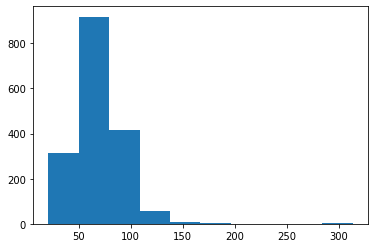

In [25]:
plt.hist(x=train['Lot Frontage'])

In [26]:
LotFrontage_Inside_mean = LotFrontage_Inside['Lot Frontage'].mean()
LotFrontage_Inside_mean

66.95277989337396

In [27]:
mask = (train['Lot Config']=='Inside')
train.loc[train['Lot Frontage'].isnull() & mask, 'Lot Frontage'] = LotFrontage_Inside_mean

In [28]:
LotFrontage_Corner_mean = LotFrontage_Corner['Lot Frontage'].mean()

In [29]:
mask = (train['Lot Config']=='Corner')
train.loc[train['Lot Frontage'].isnull() & mask, 'Lot Frontage'] = LotFrontage_Corner_mean

In [30]:
LotFrontage_CulDSac_mean = LotFrontage_CulDSac['Lot Frontage'].mean()

In [31]:
mask = (train['Lot Config']=='CulDSac')
train.loc[train['Lot Frontage'].isnull() & mask, 'Lot Frontage'] = LotFrontage_CulDSac_mean

In [32]:
LotFrontage_FR2_mean = LotFrontage_FR2['Lot Frontage'].mean()

In [33]:
mask = (train['Lot Config']=='FR2')
train.loc[train['Lot Frontage'].isnull() & mask, 'Lot Frontage'] = LotFrontage_FR2_mean

In [34]:
LotFrontage_FR3_mean = LotFrontage_FR3['Lot Frontage'].mean()

In [35]:
mask = (train['Lot Config']=='FR3')
train.loc[train['Lot Frontage'].isnull() & mask, 'Lot Frontage'] = LotFrontage_FR3_mean

In [36]:
train['Lot Frontage'].describe()

count    2051.000000
mean       68.877439
std        21.613151
min        21.000000
25%        59.000000
50%        66.952780
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [37]:
train['Lot Frontage'].isnull().sum()

0

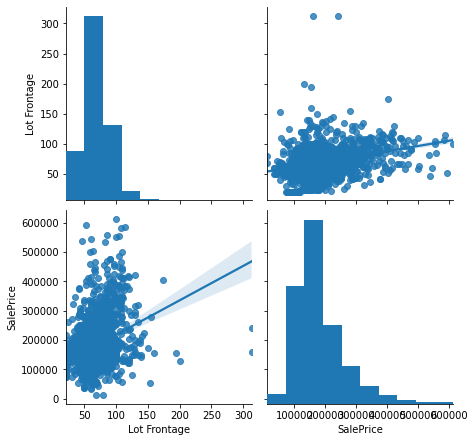

In [38]:
pairplot_LotFrontage_SalePrice = sns.pairplot(train[['Lot Frontage', 'SalePrice']],
                                             height=3,
                                             kind='reg')

#may not a strong indicator for price as a solo predictor

In [39]:
train['Alley'].unique()

array(['NA', 'Pave', 'Grvl'], dtype=object)

In [40]:
train['BsmtFin Type 1'].unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', 'NA', 'BLQ', 'LwQ', ''], dtype=object)

In [41]:
train['BsmtFin Type 1'].replace([''], 'NA', inplace=True)

In [42]:
train.loc[train['BsmtFin Type 1']=='NA']

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
12     807  906226060          70        RL    120.000000     26400   Pave   
93     811  906226100          90        RL     64.000000      7018   Pave   
114    781  905228050          20        RL     83.245552      9000   Pave   
146    888  908128060          85        RL     64.000000      7301   Pave   
183   1554  910251050          20   A (agr)     80.000000     14584   Pave   
240   2740  905451050          20        RL     80.000000     12048   Pave   
249   2242  910206010          50        RM     64.000000     11067   Pave   
256   2745  905477010          20        RL     77.000000      8335   Pave   
390     84  532351140          90        RM     68.000000      8930   Pave   
437   1501  908201100          90        RL     65.000000      6040   Pave   
485    155  535327140          20        RL     60.000000      7200   Pave   
499    812  906226110          90        RL     64.000000      7018   Pave   
514   2082  905475520          30        RL     55.228571     11515   Pave   
580   1504  908204160          90        RL     74.000000      6845   Pave   
581    946  912251110          30   I (all)    109.000000     21780   Grvl   
616   1498  908154080          20        RL    123.000000     47007   Pave   
635   2904  923125030          20   A (agr)    125.000000     31250   Pave   
642    953  914476020          90        RL     75.000000     10125   Pave   
696    274  908102060          30        RL     67.000000      8777   Pave   
700    207  903454060         190        RM     70.000000      5600   Pave   
737    788  905402070          20        RL     55.228571     15635   Pave   
772    679  535451170          90        RL     60.000000      7200   Pave   
790   1205  534276190          20        RL     74.000000      7785   Pave   
794   1255  535375140          20        RL     60.000000     10122   Pave   
924    677  535450160          90        RL     60.000000      8544   Pave   
933   1375  904101170          50        RL     80.000000     17120   Pave   
954   2622  535451190          20        RL     60.000000      7200   Pave   
1007  1880  534252070          90        RL     66.952780     10899   Pave   
1022  2703  904301410          30        RL     55.000000      8250   Pave   
1049  2177  908152180          90        RL     55.228571      9555   Pave   
1089   709  902205010          30        RM     50.000000      5925   Pave   
1098  1260  535383100         190        RL     60.000000     10800   Pave   
1125  2626  535454050          90        RL     66.952780      8544   Pave   
1157   897  908225370          50        RL     50.000000      8405   Pave   
1211  2893  916252170         120        RM     66.952780      8239   Pave   
1222  1326  902427045          20        RM     70.000000     12702   Pave   
1252   244  905478190          20        RL     60.000000     11100   Pave   
1256   813  906226120          90        RL     64.000000      7018   Pave   
1270  1569  914476080          90        RL     76.000000     10260   Pave   
1327  1342  903230120          20        RM     99.000000      5940   Pave   
1331   650  535353060          20        RL     75.000000      9533   Pave   
1377  2707  905101330          90        RL     72.000000     10791   Pave   
1387   787  905402060          20        RL     55.228571     13680   Pave   
1428  1902  534450090          20        RL     50.000000      5000   Pave   
1481  2701  904100170          20        RL    100.000000     21370   Pave   
1594  1502  908201110          90        RL     65.000000      6012   Pave   
1620   815  906226140          90        RL     64.000000      7007   Pave   
1681  1899  534429030          90        RL     70.000000      9842   Pave   
1684  2004  902427140          20        RM     52.000000      8626   Pave   
1686  2627  535454060          90        RL     60.000000      8544   Pave   
1859  2625  535454030         

In [43]:
train['BsmtFin SF 1'].unique()

array(['533', '637', '731', '0', '247', '547', '1000', '292', '650',
       '387', '393', '813', '24', '651', '492', '1158', '935', '1056',
       '1312', '553', '606', '1104', '437', '441', '1288', '548', '705',
       '916', '420', '830', '1386', '1097', '906', '210', '408', '354',
       '353', '622', '790', '176', '371', '368', '486', '85', '138',
       '524', '64', '1092', '360', '172', '206', '246', '16', '1346',
       '700', '655', '443', '168', '1904', '240', '864', '415', '833',
       '377', '280', '828', '762', '36', '1014', '60', '588', '438',
       '1153', '527', '1337', '348', '1044', '690', '962', '641', '1110',
       '421', '832', '1027', '988', '821', '290', '435', '827', '312',
       '410', '257', '378', '389', '1619', '468', '458', '120', '732',
       '659', '954', '1032', '425', '841', '644', '189', '685', '111',
       '918', '674', '789', '608', '573', '708', '129', '311', '104',
       '386', '704', '457', '170', '1173', '156', '600', '788', '550',
       '

In [44]:
train.loc[train['BsmtFin SF 1']=='']

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1327  1342  903230120          20        RM          99.0      5940   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC  Fence  \
1327    NA       IR1          Lvl  ...            0         0      NA  MnPrv   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
1327           NA        0       4    2008      ConLD      79000  

[1 rows x 81 columns]

In [45]:
train['BsmtFin SF 1'].replace([''], np.nan, inplace=True)

In [46]:
train['BsmtFin SF 1'].isnull().sum()

1

In [47]:
train['BsmtFin SF 1'] = train['BsmtFin SF 1'].astype(float)
train['BsmtFin SF 1'].dtype

dtype('float64')

In [48]:
train['BsmtFin Type 2'].unique()

array(['Unf', 'Rec', 'NA', 'BLQ', 'GLQ', 'LwQ', 'ALQ', ''], dtype=object)

In [49]:
train.loc[train['BsmtFin Type 2']=='', ['Bsmt Cond','BsmtFin Type 2','BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF']]
#1327 looks problematic, revisit dropping it after looking through the rest of the null values
#1147 as well, as it is hard to assign either NA or Unf to it given that the basement measurements don't add up

Bsmt Cond BsmtFin Type 2  BsmtFin SF 1 Bsmt Unf SF Total Bsmt SF
1147        TA                       1124.0        1603          3206
1327                                    NaN

In [50]:
train.loc[train['BsmtFin Type 2']=='Unf', ['Bsmt Cond','BsmtFin Type 2','BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF']]

Bsmt Cond BsmtFin Type 2  BsmtFin SF 1 Bsmt Unf SF Total Bsmt SF
0           TA            Unf         533.0         192           725
1           TA            Unf         637.0         276           913
2           TA            Unf         731.0         326          1057
3           TA            Unf           0.0         384           384
4           Gd            Unf           0.0         676           676
...        ...            ...           ...         ...           ...
2045        TA            Unf        1336.0         596          1932
2046        TA            Unf        1011.0         873          1884
2047        TA            Unf         262.0         599           861
2048        TA            Unf           0.0         896           896
2050        TA            Unf           0.0         994           994

[1749 rows x 5 columns]

In [51]:
train['BsmtFin SF 2'].unique()

array(['0', '713', '117', '1057', '173', '290', '420', '469', '42', '955',
       '483', '147', '596', '206', '382', '546', '202', '228', '661',
       '279', '106', '321', '232', '956', '670', '915', '116', '1080',
       '80', '215', '144', '590', '149', '281', '297', '612', '468',
       '891', '622', '507', '432', '852', '108', '128', '294', '1061',
       '127', '712', '125', '324', '252', '247', '72', '150', '906',
       '555', '38', '180', '64', '288', '311', '227', '842', '620', '181',
       '162', '354', '539', '551', '110', '219', '547', '186', '774',
       '123', '613', '167', '230', '495', '208', '308', '604', '154',
       '334', '417', '624', '442', '497', '211', '1474', '532', '132',
       '829', '1127', '435', '174', '105', '375', '608', '1039', '1063',
       '264', '270', '259', '531', '488', '500', '41', '177', '169',
       '344', '869', '182', '768', '119', '619', '345', '645', '278',
       '113', '466', '522', '6', '377', '92', '859', '479', '239', '1083',
  

In [52]:
train.loc[train['BsmtFin SF 2']=='']

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1327  1342  903230120          20        RM          99.0      5940   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC  Fence  \
1327    NA       IR1          Lvl  ...            0         0      NA  MnPrv   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
1327           NA        0       4    2008      ConLD      79000  

[1 rows x 81 columns]

In [53]:
train.loc[train['Bsmt Unf SF']=='']

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1327  1342  903230120          20        RM          99.0      5940   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC  Fence  \
1327    NA       IR1          Lvl  ...            0         0      NA  MnPrv   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
1327           NA        0       4    2008      ConLD      79000  

[1 rows x 81 columns]

In [54]:
train.drop([1327], inplace=True)

In [55]:
train.shape

(2050, 81)

In [56]:
train['BsmtFin SF 2'] = train['BsmtFin SF 2'].astype(float)
train['BsmtFin SF 2'].dtype

dtype('float64')

In [57]:
train['Bsmt Unf SF'] = train['Bsmt Unf SF'].astype(float)
train['Bsmt Unf SF'].dtype

dtype('float64')

In [58]:
train.loc[train['Total Bsmt SF']=='']

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

In [59]:
train['Bsmt Full Bath'].unique()

array(['0', '1', '2', '', '3'], dtype=object)

In [60]:
train.loc[train['Bsmt Full Bath']=='', ['Bsmt Half Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bsmt Cond','BsmtFin Type 2','BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF']]

#given that the rest of the basement stats indicate a basement may not exist at this property
#reassigning a 0 value to this row

Bsmt Half Bath Bsmt Half Bath  Full Bath  Half Bath Bsmt Cond  \
616                                        3          1        NA   

    BsmtFin Type 2  BsmtFin SF 1  Bsmt Unf SF Total Bsmt SF  
616             NA           0.0          0.0             0

In [61]:
train['Bsmt Full Bath'].replace([''], 0, inplace=True)

In [62]:
train['Bsmt Half Bath'].replace([''], 0, inplace=True)

In [63]:
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].astype(int)
train['Bsmt Full Bath'].dtype

dtype('int64')

In [64]:
train['Bsmt Half Bath'] = train['Bsmt Half Bath'].astype(int)
train['Bsmt Half Bath'].dtype

dtype('int64')

In [65]:
train.loc[train['Bsmt Half Bath']==0, ['Bsmt Half Bath', 
                                        'Bsmt Half Bath', 'Full Bath', 
                                        'Half Bath', 'Bsmt Cond',
                                        'BsmtFin Type 2',
                                        'BsmtFin SF 1', 
                                        'Bsmt Unf SF', 
                                        'Total Bsmt SF']]

Bsmt Half Bath  Bsmt Half Bath  Full Bath  Half Bath Bsmt Cond  \
0                  0               0          2          1        TA   
1                  0               0          2          1        TA   
2                  0               0          1          0        TA   
3                  0               0          2          1        TA   
4                  0               0          2          0        Gd   
...              ...             ...        ...        ...       ...   
2046               0               0          2          0        TA   
2047               0               0          1          0        TA   
2048               0               0          1          1        TA   
2049               0               0          1          0        TA   
2050               0               0          2          1        TA   

     BsmtFin Type 2  BsmtFin SF 1  Bsmt Unf SF Total Bsmt SF  
0               Unf         533.0        192.0           725  
1               Unf         637.0        276.0           913  
2               Unf         731.0        326.0          1057  
3               Unf           0.0        384.0           384  
4               Unf           0.0        676.0           676  
...             ...           ...          ...           ...  
2046            Unf        1011.0        873.0          1884  
2047            Unf         262.0        599.0           861  
2048            Unf           0.0        896.0           896  
2049            LwQ         155.0        295.0          1200  
2050            Unf           0.0        994.0           994  

[1924 rows x 9 columns]

In [66]:
train['Bsmt Half Bath'].unique()

array([0, 1, 2])

In [67]:
train['Bsmt Full Bath'].unique()

array([0, 1, 2, 3])

In [68]:
train['Fireplace Qu'].unique()

array(['NA', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [69]:
train['Fireplace Qu'].isnull().sum()

0

In [70]:
train['Garage Type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'NA', '2Types',
       'CarPort'], dtype=object)

In [71]:
train['Garage Type'].isnull().sum()

0

In [72]:
train['Garage Yr Blt'].unique()

array(['1976', '1997', '1953', '2007', '1957', '1966', '2005', '1959',
       '1952', '1969', '1971', '1900', '2000', '2004', '1916', '1963',
       '1977', '2009', '1968', '1992', '1955', '1961', '1973', '1937', '',
       '2003', '1981', '1931', '1995', '1958', '1965', '2006', '1978',
       '1954', '1935', '1951', '1996', '1999', '1920', '1930', '1924',
       '1960', '1949', '1986', '1956', '1994', '1979', '1964', '2001',
       '1972', '1939', '1962', '1927', '1948', '1967', '1993', '2010',
       '1915', '1987', '1970', '1988', '1982', '1941', '1984', '1942',
       '1950', '2002', '1975', '2008', '1974', '1998', '1918', '1938',
       '1985', '1923', '1980', '1991', '1946', '1940', '1990', '1896',
       '1983', '1914', '1945', '1921', '1925', '1926', '1936', '1932',
       '1947', '1929', '1910', '1917', '1922', '1934', '1989', '1928',
       '2207', '1933', '1895', '1919'], dtype=object)

In [73]:
train.loc[train['Garage Yr Blt']=='']

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
28    2243  911103060         190   C (all)          75.0      8250   Pave   
53     330  923226250         160        RM          21.0      1476   Pave   
65    2278  923202134          20        RL          70.0      8402   Pave   
79    2235  910201050          50        RM          50.0      7288   Pave   
101   2084  905476170          30        RL          58.0      9098   Pave   
...    ...        ...         ...       ...           ...       ...    ...   
1991   325  923204150          90        RL          94.0      9400   Pave   
2010  2880  911175410          30   C (all)          69.0     12366   Pave   
2027  2628  535456010          90        RL          75.0      8512   Pave   
2039  2288  923228220         160        RM          21.0      1495   Pave   
2042  2842  909101080          50        RL          45.0      8248   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
28      NA       Reg          Lvl  ...            0         0      NA    NA   
53      NA       Reg          Lvl  ...            0         0      NA    NA   
65      NA       Reg          Lvl  ...            0         0      NA    NA   
79      NA       Reg          Lvl  ...            0         0      NA    NA   
101     NA       IR1          Lvl  ...            0         0      NA    NA   
...    ...       ...          ...  ...          ...       ...     ...   ...   
1991    NA       Reg          Low  ...            0         0      NA    NA   
2010    NA       Reg          Lvl  ...            0         0      NA    NA   
2027    NA       Reg          Lvl  ...            0         0      NA    NA   
2039    NA       Reg          Lvl  ...            0         0      NA    NA   
2042  Grvl       Reg          Lvl  ...            0         0      NA    NA   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
28             NA        0       6    2007        WD      119600  
53             NA        0       3    2010        WD       76000  
65             NA        0      12    2007        New     147000  
79             NA        0       9    2007        WD      129850  
101            NA        0       7    2007        WD       86000  
...           ...      ...     ...     ...        ...        ...  
1991           NA        0       4    2010        WD      139000  
2010           NA        0      10    2006        WD       51689  
2027           NA        0       9    2006        WD      119000  
2039           NA        0       5    2007        WD       93900  
2042           NA        0       9    2006        COD      83000  

[114 rows x 81 columns]

In [74]:
train.loc[train['Garage Yr Blt']=='', ['Garage Yr Blt',
                                      'Garage Type']]

Garage Yr Blt Garage Type
28                          NA
53                          NA
65                          NA
79                          NA
101                         NA
...            ...         ...
1991                        NA
2010                        NA
2027                        NA
2039                        NA
2042                        NA

[114 rows x 2 columns]

In [75]:
#row gets dropped eventually
train.loc[(train['Garage Yr Blt']=='') & (train['Garage Type']!='NA')]

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1712  2237  910201180          70        RM          50.0      9060   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC  Fence  \
1712    NA       Reg          Lvl  ...            0         0      NA  MnPrv   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
1712           NA        0       3    2007        WD      150909  

[1 rows x 81 columns]

In [76]:
#assigning 0 value to allow satisfy int data type condition 
train['Garage Yr Blt'].replace([''], 0, inplace=True)

In [77]:
train['Garage Yr Blt'] = train['Garage Yr Blt'].astype(int)
train['Garage Yr Blt'].dtype

dtype('int64')

In [78]:
train['Garage Yr Blt'].unique()

array([1976, 1997, 1953, 2007, 1957, 1966, 2005, 1959, 1952, 1969, 1971,
       1900, 2000, 2004, 1916, 1963, 1977, 2009, 1968, 1992, 1955, 1961,
       1973, 1937,    0, 2003, 1981, 1931, 1995, 1958, 1965, 2006, 1978,
       1954, 1935, 1951, 1996, 1999, 1920, 1930, 1924, 1960, 1949, 1986,
       1956, 1994, 1979, 1964, 2001, 1972, 1939, 1962, 1927, 1948, 1967,
       1993, 2010, 1915, 1987, 1970, 1988, 1982, 1941, 1984, 1942, 1950,
       2002, 1975, 2008, 1974, 1998, 1918, 1938, 1985, 1923, 1980, 1991,
       1946, 1940, 1990, 1896, 1983, 1914, 1945, 1921, 1925, 1926, 1936,
       1932, 1947, 1929, 1910, 1917, 1922, 1934, 1989, 1928, 2207, 1933,
       1895, 1919])

In [79]:
train['Garage Yr Blt'].value_counts()

0       114
2005    105
2007     84
2006     80
2004     72
       ... 
1918      1
1933      1
1896      1
2207      1
1895      1
Name: Garage Yr Blt, Length: 101, dtype: int64

In [80]:
train['Garage Finish'].unique()

array(['RFn', 'Unf', 'Fin', 'NA', ''], dtype=object)

In [81]:
train.loc[train['Garage Finish']=='', ['Garage Area', 
                                       'Garage Qual', 
                                       'Garage Cond', 
                                       'Garage Yr Blt', 
                                       'Garage Type', 
                                       'Paved Drive']]

Garage Area Garage Qual Garage Cond  Garage Yr Blt Garage Type  \
1712                                                  0      Detchd   

     Paved Drive  
1712           Y

In [82]:
#dropping this row since i cannot deduce the missing values
train.drop([1712], inplace=True)
train.shape

(2049, 81)

In [83]:
train['Garage Cars'].unique()

array(['2', '1', '3', '0', '4', '5'], dtype=object)

In [84]:
train['Garage Cars'] = train['Garage Cars'].astype(int)
train['Garage Cars'].dtype

dtype('int64')

In [85]:
train['Garage Area'].unique()

array(['475', '559', '246', '400', '484', '578', '525', '531', '420',
       '504', '264', '632', '576', '480', '610', '624', '513', '528',
       '614', '450', '499', '575', '572', '530', '336', '240', '0', '542',
       '481', '410', '826', '384', '546', '276', '850', '602', '352',
       '786', '660', '270', '280', '474', '440', '564', '299', '293',
       '386', '671', '550', '690', '225', '350', '216', '380', '843',
       '539', '834', '322', '1166', '720', '392', '555', '252', '502',
       '516', '608', '495', '396', '556', '725', '670', '560', '501',
       '490', '286', '360', '479', '626', '470', '304', '864', '403',
       '579', '288', '473', '627', '758', '431', '260', '366', '852',
       '672', '486', '656', '716', '442', '297', '388', '461', '447',
       '619', '308', '506', '319', '676', '312', '478', '342', '393',
       '983', '923', '487', '543', '453', '541', '754', '666', '529',
       '714', '968', '788', '812', '600', '483', '300', '430', '230',
       '505', 

In [86]:
train.loc[train['Garage Area']=='', ['Garage Area', 
                             'Garage Qual', 
                             'Garage Cond', 
                             'Garage Yr Blt', 
                             'Garage Type', 
                             'Paved Drive']]

Empty DataFrame
Columns: [Garage Area, Garage Qual, Garage Cond, Garage Yr Blt, Garage Type, Paved Drive]
Index: []

In [87]:
train['Garage Area'] = train['Garage Area'].astype(int)
train['Garage Area'].dtype

dtype('int64')

In [88]:
train['Garage Qual'].unique()

array(['TA', 'Fa', 'NA', 'Gd', 'Ex', 'Po'], dtype=object)

In [89]:
train['Garage Cond'].unique()

array(['TA', 'Fa', 'NA', 'Po', 'Gd', 'Ex'], dtype=object)

In [90]:
train['Pool QC'].unique()

array(['NA', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [91]:
train['Fence'].unique()

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [92]:
train['Misc Feature'].unique()

array(['NA', 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [93]:
train.loc[(train['Mas Vnr Type']=='') & (train['Mas Vnr Area']=='')]

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
22    2393  528142010          60        RL    103.000000     12867   Pave   
41    2383  528110050          20        RL    107.000000     13891   Pave   
86     539  531371050          20        RL     67.000000     10083   Pave   
212    518  528458020          20        FV     90.000000      7993   Pave   
276   2824  908130020          20        RL     75.000000      8050   Pave   
338   1800  528458150          60        FV    112.000000     12217   Pave   
431   1455  907251090          60        RL     75.000000      9473   Pave   
451   1120  528439010          20        RL     87.000000     10037   Pave   
591   1841  533208040         120        FV     35.000000      4274   Pave   
844   1840  533208030         120        FV     30.000000      5330   Pave   
913   2230  909475070          20        RL     55.228571     32668   Pave   
939   1123  528462040          20        FV     95.000000     11639   Pave   
1025  1784  528435010          20        RL     85.000000      9965   Pave   
1244   485  528275160          60        RL     83.245552     12891   Pave   
1306  1752  528250010          80        RL     83.245552     11950   Pave   
1430  1185  534104100          60        FV     66.952780      7500   Pave   
1434  1128  528480160          60        FV     65.000000      8125   Pave   
1606  1096  528290090          60        RL     66.952780      7750   Pave   
1699  2261  916384070          20        RL     68.000000      8298   Pave   
1815  2456  528429100          20        RL     49.000000     15218   Pave   
1820  1728  528218010          60        RL     59.000000     15810   Pave   
1941    56  528240070          60        RL     66.952780      7851   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
22      NA       IR1          Lvl  ...            0         0      NA    NA   
41      NA       Reg          Lvl  ...            0         0      NA    NA   
86      NA       Reg          Lvl  ...            0         0      NA    NA   
212     NA       IR1          Lvl  ...            0         0      NA    NA   
276     NA       Reg          Lvl  ...            0         0      NA    NA   
338     NA       IR1          Lvl  ...            0         0      NA    NA   
431     NA       Reg          Lvl  ...            0         0      NA    NA   
451     NA       Reg          Lvl  ...            0         0      NA    NA   
591   Pave       IR1          Lvl  ...            0         0      NA    NA   
844   Pave       IR2          Lvl  ...            0         0      NA    NA   
913     NA       IR1          Lvl  ...            0         0      NA    NA   
939     NA       Reg          Lvl  ...            0         0      NA    NA   
1025    NA       Reg          Lvl  ...            0         0      NA    NA   
1244    NA       IR1          Lvl  ...            0         0      NA    NA   
1306    NA       IR1          Lvl  ...            0         0      NA    NA   
1430    NA       Reg          Lvl  ...            0         0      NA    NA   
1434    NA       Reg          Lvl  ...            0         0      NA    NA   
1606    NA       Reg          Lvl  ...            0         0      NA    NA   
1699    NA       IR1          HLS  ...            0         0      NA    NA   
1815    NA       IR1          Lvl  ...            0         0      NA    NA   
1820    NA       IR1          Lvl  ...            0         0      NA    NA   
1941    NA       Reg          Lvl  ...            0         0      NA    NA   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
22             NA        0       7    2006        New     344133  
41             NA        0       9    2006        New     465000  
86             NA        0       8    2009        WD      184900  
212            NA        0      10    2009        New     225000  
276            NA        0       4    2006        WD      11

In [94]:
train.loc[train['Mas Vnr Area']=='']

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
22    2393  528142010          60        RL    103.000000     12867   Pave   
41    2383  528110050          20        RL    107.000000     13891   Pave   
86     539  531371050          20        RL     67.000000     10083   Pave   
212    518  528458020          20        FV     90.000000      7993   Pave   
276   2824  908130020          20        RL     75.000000      8050   Pave   
338   1800  528458150          60        FV    112.000000     12217   Pave   
431   1455  907251090          60        RL     75.000000      9473   Pave   
451   1120  528439010          20        RL     87.000000     10037   Pave   
591   1841  533208040         120        FV     35.000000      4274   Pave   
844   1840  533208030         120        FV     30.000000      5330   Pave   
913   2230  909475070          20        RL     55.228571     32668   Pave   
939   1123  528462040          20        FV     95.000000     11639   Pave   
1025  1784  528435010          20        RL     85.000000      9965   Pave   
1244   485  528275160          60        RL     83.245552     12891   Pave   
1306  1752  528250010          80        RL     83.245552     11950   Pave   
1430  1185  534104100          60        FV     66.952780      7500   Pave   
1434  1128  528480160          60        FV     65.000000      8125   Pave   
1606  1096  528290090          60        RL     66.952780      7750   Pave   
1699  2261  916384070          20        RL     68.000000      8298   Pave   
1815  2456  528429100          20        RL     49.000000     15218   Pave   
1820  1728  528218010          60        RL     59.000000     15810   Pave   
1941    56  528240070          60        RL     66.952780      7851   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
22      NA       IR1          Lvl  ...            0         0      NA    NA   
41      NA       Reg          Lvl  ...            0         0      NA    NA   
86      NA       Reg          Lvl  ...            0         0      NA    NA   
212     NA       IR1          Lvl  ...            0         0      NA    NA   
276     NA       Reg          Lvl  ...            0         0      NA    NA   
338     NA       IR1          Lvl  ...            0         0      NA    NA   
431     NA       Reg          Lvl  ...            0         0      NA    NA   
451     NA       Reg          Lvl  ...            0         0      NA    NA   
591   Pave       IR1          Lvl  ...            0         0      NA    NA   
844   Pave       IR2          Lvl  ...            0         0      NA    NA   
913     NA       IR1          Lvl  ...            0         0      NA    NA   
939     NA       Reg          Lvl  ...            0         0      NA    NA   
1025    NA       Reg          Lvl  ...            0         0      NA    NA   
1244    NA       IR1          Lvl  ...            0         0      NA    NA   
1306    NA       IR1          Lvl  ...            0         0      NA    NA   
1430    NA       Reg          Lvl  ...            0         0      NA    NA   
1434    NA       Reg          Lvl  ...            0         0      NA    NA   
1606    NA       Reg          Lvl  ...            0         0      NA    NA   
1699    NA       IR1          HLS  ...            0         0      NA    NA   
1815    NA       IR1          Lvl  ...            0         0      NA    NA   
1820    NA       IR1          Lvl  ...            0         0      NA    NA   
1941    NA       Reg          Lvl  ...            0         0      NA    NA   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
22             NA        0       7    2006        New     344133  
41             NA        0       9    2006        New     465000  
86             NA        0       8    2009        WD      184900  
212            NA        0      10    2009        New     225000  
276            NA        0       4    2006        WD      11

In [95]:
train.loc[train['Mas Vnr Type']=='']

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
22    2393  528142010          60        RL    103.000000     12867   Pave   
41    2383  528110050          20        RL    107.000000     13891   Pave   
86     539  531371050          20        RL     67.000000     10083   Pave   
212    518  528458020          20        FV     90.000000      7993   Pave   
276   2824  908130020          20        RL     75.000000      8050   Pave   
338   1800  528458150          60        FV    112.000000     12217   Pave   
431   1455  907251090          60        RL     75.000000      9473   Pave   
451   1120  528439010          20        RL     87.000000     10037   Pave   
591   1841  533208040         120        FV     35.000000      4274   Pave   
844   1840  533208030         120        FV     30.000000      5330   Pave   
913   2230  909475070          20        RL     55.228571     32668   Pave   
939   1123  528462040          20        FV     95.000000     11639   Pave   
1025  1784  528435010          20        RL     85.000000      9965   Pave   
1244   485  528275160          60        RL     83.245552     12891   Pave   
1306  1752  528250010          80        RL     83.245552     11950   Pave   
1430  1185  534104100          60        FV     66.952780      7500   Pave   
1434  1128  528480160          60        FV     65.000000      8125   Pave   
1606  1096  528290090          60        RL     66.952780      7750   Pave   
1699  2261  916384070          20        RL     68.000000      8298   Pave   
1815  2456  528429100          20        RL     49.000000     15218   Pave   
1820  1728  528218010          60        RL     59.000000     15810   Pave   
1941    56  528240070          60        RL     66.952780      7851   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
22      NA       IR1          Lvl  ...            0         0      NA    NA   
41      NA       Reg          Lvl  ...            0         0      NA    NA   
86      NA       Reg          Lvl  ...            0         0      NA    NA   
212     NA       IR1          Lvl  ...            0         0      NA    NA   
276     NA       Reg          Lvl  ...            0         0      NA    NA   
338     NA       IR1          Lvl  ...            0         0      NA    NA   
431     NA       Reg          Lvl  ...            0         0      NA    NA   
451     NA       Reg          Lvl  ...            0         0      NA    NA   
591   Pave       IR1          Lvl  ...            0         0      NA    NA   
844   Pave       IR2          Lvl  ...            0         0      NA    NA   
913     NA       IR1          Lvl  ...            0         0      NA    NA   
939     NA       Reg          Lvl  ...            0         0      NA    NA   
1025    NA       Reg          Lvl  ...            0         0      NA    NA   
1244    NA       IR1          Lvl  ...            0         0      NA    NA   
1306    NA       IR1          Lvl  ...            0         0      NA    NA   
1430    NA       Reg          Lvl  ...            0         0      NA    NA   
1434    NA       Reg          Lvl  ...            0         0      NA    NA   
1606    NA       Reg          Lvl  ...            0         0      NA    NA   
1699    NA       IR1          HLS  ...            0         0      NA    NA   
1815    NA       IR1          Lvl  ...            0         0      NA    NA   
1820    NA       IR1          Lvl  ...            0         0      NA    NA   
1941    NA       Reg          Lvl  ...            0         0      NA    NA   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
22             NA        0       7    2006        New     344133  
41             NA        0       9    2006        New     465000  
86             NA        0       8    2009        WD      184900  
212            NA        0      10    2009        New     225000  
276            NA        0       4    2006        WD      11

In [96]:
# replacing the type to None and area to 0 since the the missing values are consistent 
# between the two related variables and there are only 16 rows
train['Mas Vnr Type'].replace([''], 'None', inplace=True)

In [97]:
train.loc[train['Mas Vnr Type']=='']

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

In [98]:
train['Mas Vnr Type'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [99]:
train['Mas Vnr Area'].unique()

array(['289', '132', '0', '82', '180', '192', '232', '456', '148', '',
       '3', '336', '480', '320', '104', '335', '40', '110', '106', '513',
       '184', '522', '143', '348', '117', '510', '145', '96', '668', '50',
       '228', '65', '361', '748', '197', '572', '128', '120', '254', '86',
       '30', '54', '246', '397', '296', '144', '902', '261', '260', '275',
       '57', '1050', '359', '108', '662', '500', '210', '165', '208',
       '360', '160', '64', '224', '206', '116', '651', '504', '252',
       '337', '84', '309', '466', '600', '189', '368', '198', '140',
       '922', '16', '18', '90', '425', '245', '234', '766', '219', '182',
       '136', '576', '270', '150', '256', '176', '479', '647', '115',
       '221', '272', '714', '95', '170', '172', '200', '205', '162',
       '240', '100', '412', '564', '74', '468', '298', '149', '604',
       '105', '428', '332', '452', '164', '660', '365', '1115', '157',
       '525', '41', '324', '216', '236', '174', '340', '274', '39', '

In [100]:
train['Mas Vnr Area'].replace([''], 0, inplace=True)

In [101]:
train.loc[train['Mas Vnr Area']=='']

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

In [102]:
train['Mas Vnr Area'] = train['Mas Vnr Area'].astype(float)
train['Mas Vnr Area'].dtype

dtype('float64')

In [103]:
train.loc[(train['Mas Vnr Type']=='') & (train['Mas Vnr Area']=='')]

/Users/johnsmith/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

In [104]:
train.loc[train['Total Bsmt SF']=='']

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

In [105]:
train['Total Bsmt SF'] = train['Total Bsmt SF'].astype(float)
train['Total Bsmt SF'].dtype

dtype('float64')

In [106]:
train['Total Bsmt SF'].isnull().sum()

0

In [107]:
train.loc[train['Bsmt Exposure']=='', ['Bsmt Exposure',
                                      'Bsmt Qual',
                                      'Bsmt Cond',
                                      'BsmtFin Type 1',
                                      'BsmtFin SF 1',
                                      'BsmtFin Type 2']]

Bsmt Exposure Bsmt Qual Bsmt Cond BsmtFin Type 1  BsmtFin SF 1  \
1456                      Gd        TA            Unf           0.0   
1547                      Gd        TA            Unf           0.0   
1997                      Gd        TA            Unf           0.0   

     BsmtFin Type 2  
1456            Unf  
1547            Unf  
1997            Unf

In [108]:
#assigning the value of No (no exposure) as the other variables indicate that a basement is present 
#and is probably unfinished
train['Bsmt Exposure'].replace([''], 'No', inplace=True)
train.loc[train['Bsmt Exposure']=='']

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

In [109]:
train['Bsmt Exposure'].unique()

array(['No', 'Gd', 'Av', 'NA', 'Mn'], dtype=object)

In [110]:
train.notnull().sum()

Id              2049
PID             2049
MS SubClass     2049
MS Zoning       2049
Lot Frontage    2049
                ... 
Misc Val        2049
Mo Sold         2049
Yr Sold         2049
Sale Type       2049
SalePrice       2049
Length: 81, dtype: int64

In [111]:
numerical_columns = train.select_dtypes(include=['float64', 'int'])
numerical_columns.head()

Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0     55.228571     13517             6             8        1976   
1     43.000000     11492             7             5        1996   
2     68.000000      7922             5             7        1953   
3     73.000000      9802             5             5        2006   
4     82.000000     14235             6             8        1900   

   Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  ...  \
0            2005         289.0         533.0           0.0        192.0  ...   
1            1997         132.0         637.0           0.0        276.0  ...   
2            2007           0.0         731.0           0.0        326.0  ...   
3            2007           0.0           0.0           0.0        384.0  ...   
4            1993           0.0           0.0           0.0        676.0  ...   

   Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
0             0             44               0           0             0   
1             0             74               0           0             0   
2             0             52               0           0             0   
3           100              0               0           0             0   
4             0             59               0           0             0   

   Pool Area  Misc Val  Mo Sold  Yr Sold  SalePrice  
0          0         0        3     2010     130500  
1          0         0        4     2009     220000  
2          0         0        1     2010     109000  
3          0         0        4     2010     174000  
4          0         0        3     2010     138500  

[5 rows x 36 columns]

Reviewing null values for numerical columns now

In [112]:
numerical_vars = numerical_columns.drop(['Overall Qual', 
                                          'Overall Cond', 
                                          'Garage Cars', 
                                          'Year Built', 
                                          'Year Remod/Add', 
                                          'Bsmt Full Bath', 
                                          'Bsmt Half Bath', 
                                          'Full Bath', 
                                          'Half Bath', 
                                          'Bedroom AbvGr', 
                                          'Kitchen AbvGr', 
                                          'TotRms AbvGrd', 
                                          'Fireplaces', 
                                          'Garage Yr Blt', 
                                          'Mo Sold', 
                                          'Yr Sold'], axis=1)

In [113]:
numerical_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2049 non-null   float64
 1   Lot Area         2049 non-null   int64  
 2   Mas Vnr Area     2049 non-null   float64
 3   BsmtFin SF 1     2049 non-null   float64
 4   BsmtFin SF 2     2049 non-null   float64
 5   Bsmt Unf SF      2049 non-null   float64
 6   Total Bsmt SF    2049 non-null   float64
 7   1st Flr SF       2049 non-null   int64  
 8   2nd Flr SF       2049 non-null   int64  
 9   Low Qual Fin SF  2049 non-null   int64  
 10  Gr Liv Area      2049 non-null   int64  
 11  Garage Area      2049 non-null   int64  
 12  Wood Deck SF     2049 non-null   int64  
 13  Open Porch SF    2049 non-null   int64  
 14  Enclosed Porch   2049 non-null   int64  
 15  3Ssn Porch       2049 non-null   int64  
 16  Screen Porch     2049 non-null   int64  
 17  Pool Area     

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2049 non-null   object 
 1   PID              2049 non-null   object 
 2   MS SubClass      2049 non-null   object 
 3   MS Zoning        2049 non-null   object 
 4   Lot Frontage     2049 non-null   float64
 5   Lot Area         2049 non-null   int64  
 6   Street           2049 non-null   object 
 7   Alley            2049 non-null   object 
 8   Lot Shape        2049 non-null   object 
 9   Land Contour     2049 non-null   object 
 10  Utilities        2049 non-null   object 
 11  Lot Config       2049 non-null   object 
 12  Land Slope       2049 non-null   object 
 13  Neighborhood     2049 non-null   object 
 14  Condition 1      2049 non-null   object 
 15  Condition 2      2049 non-null   object 
 16  Bldg Type        2049 non-null   object 
 17  House Style   

In [115]:
numerical_vars.describe().transpose()

count           mean           std      min       25%  \
Lot Frontage     2049.0      68.871951     21.609428     21.0      59.0   
Lot Area         2049.0   10067.712055   6745.127386   1300.0    7500.0   
Mas Vnr Area     2049.0      98.722792    174.382527      0.0       0.0   
BsmtFin SF 1     2049.0     442.248902    461.310793      0.0       0.0   
BsmtFin SF 2     2049.0      47.982430    165.037776      0.0       0.0   
Bsmt Unf SF      2049.0     567.853587    445.027230      0.0     220.0   
Total Bsmt SF    2049.0    1058.084919    449.498894      0.0     793.0   
1st Flr SF       2049.0    1164.727672    396.565535    334.0     879.0   
2nd Flr SF       2049.0     329.218155    425.638942      0.0       0.0   
Low Qual Fin SF  2049.0       5.518302     51.093509      0.0       0.0   
Gr Liv Area      2049.0    1499.464129    500.461893    334.0    1130.0   
Garage Area      2049.0     473.766227    215.944850      0.0     319.0   
Wood Deck SF     2049.0      93.840410    128.583252      0.0       0.0   
Open Porch SF    2049.0      47.603221     66.763270      0.0       0.0   
Enclosed Porch   2049.0      22.490483     59.725692      0.0       0.0   
3Ssn Porch       2049.0       2.593948     25.241801      0.0       0.0   
Screen Porch     2049.0      16.527574     57.399890      0.0       0.0   
Pool Area        2049.0       2.400195     37.800940      0.0       0.0   
Misc Val         2049.0      51.624695    573.671628      0.0       0.0   
SalePrice        2049.0  181534.626159  79262.113026  12789.0  129850.0   

                          50%       75%       max  
Lot Frontage         66.95278      80.0     313.0  
Lot Area           9434.00000   11515.0  159000.0  
Mas Vnr Area          0.00000     160.0    1600.0  
BsmtFin SF 1        368.00000     734.0    5644.0  
BsmtFin SF 2          0.00000       0.0    1474.0  
Bsmt Unf SF         475.00000     811.0    2336.0  
Total Bsmt SF       995.00000    1319.0    6110.0  
1st Flr SF         1093.00000    1405.0    5095.0  
2nd Flr SF            0.00000     691.0    1862.0  
Low Qual Fin SF       0.00000       0.0    1064.0  
Gr Liv Area        1444.00000    1728.0    5642.0  
Garage Area         480.00000     576.0    1418.0  
Wood Deck SF          0.00000     168.0    1424.0  
Open Porch SF        27.00000      70.0     547.0  
Enclosed Porch        0.00000       0.0     432.0  
3Ssn Porch            0.00000       0.0     508.0  
Screen Porch          0.00000       0.0     490.0  
Pool Area             0.00000       0.0     800.0  
Misc Val              0.00000       0.0   17000.0  
SalePrice        162500.00000  214000.0  611657.0

In [116]:
numerical_vars.isnull().sum()

Lot Frontage       0
Lot Area           0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

In [117]:
numerical_vars.astype(bool).sum(axis=0)

Lot Frontage       2049
Lot Area           2049
Mas Vnr Area        813
BsmtFin SF 1       1392
BsmtFin SF 2        247
Bsmt Unf SF        1884
Total Bsmt SF      1995
1st Flr SF         2049
2nd Flr SF          859
Low Qual Fin SF      33
Gr Liv Area        2049
Garage Area        1936
Wood Deck SF        975
Open Porch SF      1139
Enclosed Porch      326
3Ssn Porch           26
Screen Porch        181
Pool Area             9
Misc Val             65
SalePrice          2049
dtype: int64

In [118]:
# Found float and int columns that should be categorical (ordinal)
num_to_cat = train.loc[:,['Id',
                          'Overall Qual', 
                          'Overall Cond', 
                          'Garage Cars',
                          'Year Built',
                          'Year Remod/Add',
                          'Bsmt Full Bath',
                          'Bsmt Half Bath',
                          'Full Bath',
                          'Half Bath',
                          'Bedroom AbvGr',
                          'Kitchen AbvGr',
                          'TotRms AbvGrd',
                          'Fireplaces',
                          'Garage Yr Blt',
                          'Mo Sold',
                          'Yr Sold']]
num_to_cat.head()

Id  Overall Qual  Overall Cond  Garage Cars  Year Built  Year Remod/Add  \
0  109             6             8            2        1976            2005   
1  544             7             5            2        1996            1997   
2  153             5             7            1        1953            2007   
3  318             5             5            2        2006            2007   
4  255             6             8            2        1900            1993   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          1              3   
1               1               0          2          1              4   
2               1               0          1          0              3   
3               0               0          2          1              3   
4               0               0          2          0              3   

   Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Yr Blt  Mo Sold  Yr Sold  
0              1              6           0           1976        3     2010  
1              1              8           1           1997        4     2009  
2              1              5           0           1953        1     2010  
3              1              7           0           2007        4     2010  
4              1              6           0           1957        3     2010

In [119]:
num_to_cat.shape

(2049, 17)

In [120]:
num_to_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              2049 non-null   object
 1   Overall Qual    2049 non-null   int64 
 2   Overall Cond    2049 non-null   int64 
 3   Garage Cars     2049 non-null   int64 
 4   Year Built      2049 non-null   int64 
 5   Year Remod/Add  2049 non-null   int64 
 6   Bsmt Full Bath  2049 non-null   int64 
 7   Bsmt Half Bath  2049 non-null   int64 
 8   Full Bath       2049 non-null   int64 
 9   Half Bath       2049 non-null   int64 
 10  Bedroom AbvGr   2049 non-null   int64 
 11  Kitchen AbvGr   2049 non-null   int64 
 12  TotRms AbvGrd   2049 non-null   int64 
 13  Fireplaces      2049 non-null   int64 
 14  Garage Yr Blt   2049 non-null   int64 
 15  Mo Sold         2049 non-null   int64 
 16  Yr Sold         2049 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 288.1+ KB


In [121]:
draft_categorical = train.select_dtypes(include=['object'])
draft_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              2049 non-null   object
 1   PID             2049 non-null   object
 2   MS SubClass     2049 non-null   object
 3   MS Zoning       2049 non-null   object
 4   Street          2049 non-null   object
 5   Alley           2049 non-null   object
 6   Lot Shape       2049 non-null   object
 7   Land Contour    2049 non-null   object
 8   Utilities       2049 non-null   object
 9   Lot Config      2049 non-null   object
 10  Land Slope      2049 non-null   object
 11  Neighborhood    2049 non-null   object
 12  Condition 1     2049 non-null   object
 13  Condition 2     2049 non-null   object
 14  Bldg Type       2049 non-null   object
 15  House Style     2049 non-null   object
 16  Roof Style      2049 non-null   object
 17  Roof Matl       2049 non-null   object
 18  Exterior

In [122]:
categorical = draft_categorical.drop(['PID'], axis=1)

In [123]:
categorical = pd.merge(categorical, num_to_cat, left_on='Id', right_on='Id')

In [124]:
categorical.shape

(2049, 60)

In [125]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2048
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              2049 non-null   object
 1   MS SubClass     2049 non-null   object
 2   MS Zoning       2049 non-null   object
 3   Street          2049 non-null   object
 4   Alley           2049 non-null   object
 5   Lot Shape       2049 non-null   object
 6   Land Contour    2049 non-null   object
 7   Utilities       2049 non-null   object
 8   Lot Config      2049 non-null   object
 9   Land Slope      2049 non-null   object
 10  Neighborhood    2049 non-null   object
 11  Condition 1     2049 non-null   object
 12  Condition 2     2049 non-null   object
 13  Bldg Type       2049 non-null   object
 14  House Style     2049 non-null   object
 15  Roof Style      2049 non-null   object
 16  Roof Matl       2049 non-null   object
 17  Exterior 1st    2049 non-null   object
 18  Exterior

In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2049 non-null   object 
 1   PID              2049 non-null   object 
 2   MS SubClass      2049 non-null   object 
 3   MS Zoning        2049 non-null   object 
 4   Lot Frontage     2049 non-null   float64
 5   Lot Area         2049 non-null   int64  
 6   Street           2049 non-null   object 
 7   Alley            2049 non-null   object 
 8   Lot Shape        2049 non-null   object 
 9   Land Contour     2049 non-null   object 
 10  Utilities        2049 non-null   object 
 11  Lot Config       2049 non-null   object 
 12  Land Slope       2049 non-null   object 
 13  Neighborhood     2049 non-null   object 
 14  Condition 1      2049 non-null   object 
 15  Condition 2      2049 non-null   object 
 16  Bldg Type        2049 non-null   object 
 17  House Style   

Checking the test dataset

In [127]:
test = pd.read_csv('../datasets/test.csv', keep_default_na=False, dtype={'MS SubClass': np.object, 
                                                                           'Id' : np.object, 
                                                                           'PID': np.object})

In [128]:
test.head()

Id        PID MS SubClass MS Zoning Lot Frontage  Lot Area Street Alley  \
0  2658  902301120         190        RM           69      9142   Pave  Grvl   
1  2718  905108090          90        RL                   9662   Pave    NA   
2  2414  528218130          60        RL           58     17104   Pave    NA   
3  1989  902207150          30        RM           60      8520   Pave    NA   
4   625  535105100          20        RL                   9500   Pave    NA   

  Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC Fence  \
0       Reg          Lvl  ...          0            0         0      NA    NA   
1       IR1          Lvl  ...          0            0         0      NA    NA   
2       IR1          Lvl  ...          0            0         0      NA    NA   
3       Reg          Lvl  ...          0            0         0      NA    NA   
4       IR1          Lvl  ...          0          185         0      NA    NA   

  Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0           NA        0       4     2006        WD   
1           NA        0       8     2006        WD   
2           NA        0       9     2006        New  
3           NA        0       7     2007        WD   
4           NA        0       7     2009        WD   

[5 rows x 80 columns]

In [129]:
test.shape

(879, 80)

In [130]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               879 non-null    object
 1   PID              879 non-null    object
 2   MS SubClass      879 non-null    object
 3   MS Zoning        879 non-null    object
 4   Lot Frontage     879 non-null    object
 5   Lot Area         879 non-null    int64 
 6   Street           879 non-null    object
 7   Alley            879 non-null    object
 8   Lot Shape        879 non-null    object
 9   Land Contour     879 non-null    object
 10  Utilities        879 non-null    object
 11  Lot Config       879 non-null    object
 12  Land Slope       879 non-null    object
 13  Neighborhood     879 non-null    object
 14  Condition 1      879 non-null    object
 15  Condition 2      879 non-null    object
 16  Bldg Type        879 non-null    object
 17  House Style      879 non-null    ob

In [131]:
test['Lot Frontage'].unique()

array(['69', '', '58', '60', '21', '52', '39', '75', '50', '68', '80',
       '121', '51', '65', '74', '73', '40', '46', '61', '85', '136', '34',
       '70', '59', '130', '100', '77', '131', '67', '79', '98', '53',
       '95', '37', '106', '90', '120', '72', '76', '118', '24', '78',
       '86', '102', '66', '112', '63', '57', '110', '89', '103', '105',
       '48', '43', '160', '31', '55', '84', '44', '150', '35', '64', '71',
       '122', '174', '49', '47', '93', '56', '149', '87', '168', '82',
       '36', '41', '96', '88', '83', '45', '94', '54', '30', '124', '81',
       '42', '152', '115', '113', '101', '104', '116', '62', '114', '107',
       '33', '99', '91', '97', '126', '28', '108', '133', '32', '92',
       '182'], dtype=object)

In [132]:
test.loc[test['Lot Frontage']=='']

Id        PID MS SubClass MS Zoning Lot Frontage  Lot Area Street  \
1    2718  905108090          90        RL                   9662   Pave   
4     625  535105100          20        RL                   9500   Pave   
7     858  907202130          20        RL                   9286   Pave   
13    818  906230030          90        RL                   7976   Pave   
20    222  905105070          20        RL                   8246   Pave   
..    ...        ...         ...       ...          ...       ...    ...   
854  2582  535301010          90        RL                   7032   Pave   
860   984  923275140          20        RL                   8780   Pave   
867  2271  916460020          20        RL                   7777   Pave   
868  1633  527182170         160        RL                   5062   Pave   
870  2765  906426090          20        RL                  36500   Pave   

    Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area  \
1      NA       IR1          Lvl  ...          0            0         0   
4      NA       IR1          Lvl  ...          0          185         0   
7      NA       IR1          Lvl  ...          0            0         0   
13     NA       Reg          Lvl  ...          0            0         0   
20     NA       IR1          Lvl  ...          0            0         0   
..    ...       ...          ...  ...        ...          ...       ...   
854    NA       IR1          Lvl  ...          0            0         0   
860    NA       IR1          Lvl  ...          0            0         0   
867    NA       IR1          Lvl  ...          0            0         0   
868    NA       IR1          Lvl  ...          0            0         0   
870    NA       IR1          Low  ...          0            0         0   

    Pool QC  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
1        NA     NA           NA        0       8     2006        WD   
4        NA     NA           NA        0       7     2009        WD   
7        NA     NA           NA        0      10     2009        WD   
13       NA     NA           NA        0      10     2009        WD   
20       NA  MnPrv           NA        0       5     2010        WD   
..      ...    ...          ...      ...     ...      ...        ...  
854      NA     NA           NA        0      12     2006        WD   
860      NA  MnPrv           NA        0       3     2009        WD   
867      NA     NA           NA        0      11     2007        WD   
868      NA     NA           NA        0       9     2007        WD   
870      NA     NA           NA        0       6     2006        WD   

[160 rows x 80 columns]

In [133]:
test_data_cleaning = pd.read_csv('../datasets/test.csv')

In [134]:
test_data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

4   Lot Frontage     719 non-null    float64 - found '' values and corrected, changed to float

7   Alley            58 non-null     object - NA is a valid category and the data dictionary confirms this 

31  Bsmt Qual        854 non-null    object - NA is a valid category and the data dictionary confirms this

32  Bsmt Cond        854 non-null    object - NA is a valid category and the data dictionary confirms this

33  Bsmt Exposure    854 non-null    object - NA is a valid category and the data dictionary confirms this 

34  BsmtFin Type 1   854 non-null    object - NA is a valid category and the data dictionary confirms this 

58  Fireplace Qu     457 non-null    object - NA is a valid category and the data dictionary confirms this

59  Garage Type      835 non-null    object - NA is a valid category and the data dictionary confirms this

60  Garage Yr Blt    834 non-null    float64 - found a few '' values that have been corrected to np.nan and changing to float

61  Garage Finish    834 non-null    object - found one row with missing values but could not deduce missing values, dropping this row

64  Garage Qual      834 non-null    object - found one row with missing values but could not deduce missing values, dropping this row

65  Garage Cond      834 non-null    object - found one row with missing values but could not deduce missing values, dropping this row

73  Pool QC          4 non-null      object - NA is a valid category and the data dictionary confirms this

74  Fence            172 non-null    object - NA is a valid category and the data dictionary confirms this

75  Misc Feature     41 non-null     object - NA is a valid category and the data dictionary confirms this


In [135]:
test['Lot Frontage'].replace([''], np.nan, inplace=True)
test['Lot Frontage'].unique()

array(['69', nan, '58', '60', '21', '52', '39', '75', '50', '68', '80',
       '121', '51', '65', '74', '73', '40', '46', '61', '85', '136', '34',
       '70', '59', '130', '100', '77', '131', '67', '79', '98', '53',
       '95', '37', '106', '90', '120', '72', '76', '118', '24', '78',
       '86', '102', '66', '112', '63', '57', '110', '89', '103', '105',
       '48', '43', '160', '31', '55', '84', '44', '150', '35', '64', '71',
       '122', '174', '49', '47', '93', '56', '149', '87', '168', '82',
       '36', '41', '96', '88', '83', '45', '94', '54', '30', '124', '81',
       '42', '152', '115', '113', '101', '104', '116', '62', '114', '107',
       '33', '99', '91', '97', '126', '28', '108', '133', '32', '92',
       '182'], dtype=object)

In [136]:
test['Lot Frontage'] = test['Lot Frontage'].astype(float)
test['Lot Frontage'].dtype

dtype('float64')

In [137]:
test['Lot Frontage'].isnull().sum()

160

In [138]:
test['Alley'].unique()

array(['Grvl', 'NA', 'Pave'], dtype=object)

In [139]:
test['Bsmt Qual'].unique()

array(['Fa', 'Gd', 'TA', 'Ex', 'NA', 'Po'], dtype=object)

In [140]:
test['Bsmt Cond'].unique()

array(['TA', 'Gd', 'NA', 'Fa'], dtype=object)

In [141]:
test['Bsmt Exposure'].unique()

array(['No', 'Av', 'NA', 'Mn', 'Gd'], dtype=object)

In [142]:
test['BsmtFin Type 1'].unique()

array(['Unf', 'GLQ', 'BLQ', 'Rec', 'ALQ', 'NA', 'LwQ'], dtype=object)

In [143]:
test['Fireplace Qu'].unique()

array(['NA', 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

In [144]:
test['Garage Type'].unique()

array(['Detchd', 'Attchd', 'BuiltIn', 'NA', '2Types', 'CarPort',
       'Basment'], dtype=object)

In [145]:
test.loc[test['Garage Yr Blt']=='', ['Garage Area', 
                             'Garage Qual', 
                             'Garage Cond', 
                             'Garage Yr Blt', 
                             'Garage Type', 
                             'Paved Drive']]

Garage Area Garage Qual Garage Cond Garage Yr Blt Garage Type Paved Drive
29             0          NA          NA                        NA           N
45             0          NA          NA                        NA           Y
66             0          NA          NA                        NA           Y
68             0          NA          NA                        NA           Y
106            0          NA          NA                        NA           Y
110            0          NA          NA                        NA           Y
114            0          NA          NA                        NA           Y
145            0          NA          NA                        NA           Y
153            0          NA          NA                        NA           N
157            0          NA          NA                        NA           Y
181            0          NA          NA                        NA           N
219            0          NA          NA                        NA           N
231            0          NA          NA                        NA           Y
232            0          NA          NA                        NA           Y
257            0          NA          NA                        NA           N
283            0          NA          NA                        NA           Y
306            0          NA          NA                        NA           Y
315            0          NA          NA                        NA           Y
321            0          NA          NA                        NA           N
338            0          NA          NA                        NA           N
342            0          NA          NA                        NA           N
351            0          NA          NA                        NA           N
360            0          NA          NA                        NA           N
396            0          NA          NA                        NA           N
483            0          NA          NA                        NA           Y
497            0          NA          NA                        NA           N
528            0          NA          NA                        NA           Y
530            0          NA          NA                        NA           N
537            0          NA          NA                        NA           Y
556            0          NA          NA                        NA           N
567            0          NA          NA                        NA           Y
592            0          NA          NA                        NA           Y
597            0          NA          NA                        NA           N
611            0          NA          NA                        NA           N
616            0          NA          NA                        NA           N
619            0          NA          NA                        NA           N
630            0          NA          NA                        NA           Y
675            0          NA          NA                        NA           Y
699            0          NA          NA                        NA           Y
712            0          NA          NA                        NA           N
765          360          NA          NA                    Detchd           Y
780            0          NA          NA                        NA           Y
804            0          NA          NA                        NA           N
814            0          NA          NA                        NA           Y
860            0          NA          NA                        NA           Y

In [146]:
test['Garage Yr Blt'].replace([''], np.nan, inplace=True)
test['Garage Yr Blt'].unique()

array(['1910', '1977', '2006', '1935', '1963', '1972', '1959', '1978',
       '2004', '1980', '1991', '1993', '1954', '2000', '1943', '1957',
       '1940', '1956', '1961', '1925', '1968', '1982', '1969', '2007',
       '1989', '1920', '1937', nan, '1979', '1962', '1950', '1973',
       '2001', '1952', '1953', '1999', '2009', '1998', '1974', '1951',
       '1987', '2003', '1924', '1970', '1975', '1958', '1971', '1992',
       '1994', '2005', '1960', '1967', '2002', '1997', '1981', '1938',
       '1988', '1939', '1927', '1984', '1964', '1995', '2008', '1966',
       '1941', '1983', '1906', '1930', '1955', '1946', '1996', '1928',
       '1976', '1915', '1923', '1965', '1947', '1900', '1918', '1934',
       '1932', '1986', '2010', '1985', '1949', '1948', '1917', '1990',
       '1921', '1926', '1931', '1916', '1922', '1908'], dtype=object)

In [147]:
test['Garage Yr Blt'] = test['Garage Yr Blt'].astype(float)
test['Garage Yr Blt'].dtypes

dtype('float64')

In [148]:
test['Garage Finish'].unique()

array(['Unf', 'Fin', 'RFn', 'NA', ''], dtype=object)

In [149]:
test.loc[test['Garage Finish']=='', ['Garage Area', 
                             'Garage Qual', 
                             'Garage Cond', 
                             'Garage Yr Blt', 
                             'Garage Type', 
                             'Paved Drive']]

Garage Area Garage Qual Garage Cond  Garage Yr Blt Garage Type  \
765          360          NA          NA            NaN      Detchd   

    Paved Drive  
765           Y

In [150]:
filling_null = test['Garage Finish'] == ''
test.loc[filling_null, 'Garage Finish'] = test.fillna('NA', inplace=True)

# cannot find evidence that a garage exists for this property based on other Garage variables  

In [151]:
test['Garage Finish'].unique()

array(['Unf', 'Fin', 'RFn', 'NA', None], dtype=object)

In [152]:
test['Garage Finish'].isnull().sum()

1

In [153]:
test.shape

(879, 80)

In [154]:
test['Garage Finish'].unique()

array(['Unf', 'Fin', 'RFn', 'NA', None], dtype=object)

In [155]:
test['Garage Qual'].unique()

array(['Po', 'TA', 'Fa', 'NA', 'Gd'], dtype=object)

In [156]:
test['Garage Cond'].unique()

array(['Po', 'TA', 'NA', 'Fa', 'Gd', 'Ex'], dtype=object)

In [157]:
test['Pool QC'].unique()

array(['NA', 'Ex', 'TA'], dtype=object)

In [158]:
test['Fence'].unique()

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [159]:
test['Misc Feature'].unique()

array(['NA', 'Shed', 'Othr', 'Gar2'], dtype=object)

In [160]:
test['Mas Vnr Type'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', 'CBlock', ''], dtype=object)

In [161]:
test['Mas Vnr Type'].replace([''], np.nan, inplace=True)

In [162]:
test['Mas Vnr Type'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', 'CBlock', nan], dtype=object)

In [163]:
test.loc[test['Mas Vnr Area']=='']

Id        PID MS SubClass MS Zoning Lot Frontage  Lot Area Street Alley  \
866  868  907260030          60        RL           70      8749   Pave    NA   

    Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
866       Reg          Lvl  ...          0            0         0      NA   

    Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
866    NA           NA        0      11     2009        WD   

[1 rows x 80 columns]

In [164]:
test['Mas Vnr Area'].replace([''], 0, inplace=True)

In [165]:
test['Mas Vnr Area'] = test['Mas Vnr Area'].astype(float)
test['Mas Vnr Area'].dtype

dtype('float64')

In [166]:
test.loc[test['Mas Vnr Area']=='']

/Users/johnsmith/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type]
Index: []

[0 rows x 80 columns]

In [167]:
test.loc[test['Total Bsmt SF']=='']

/Users/johnsmith/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type]
Index: []

[0 rows x 80 columns]

In [168]:
test['Total Bsmt SF'] = test['Total Bsmt SF'].astype(float)
test['Total Bsmt SF'].dtypes

dtype('float64')

In [169]:
test['Bsmt Exposure'].unique()

array(['No', 'Av', 'NA', 'Mn', 'Gd'], dtype=object)

In [170]:
test.loc[test['Bsmt Exposure']=='']

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type]
Index: []

[0 rows x 80 columns]

### EDA <a name = "paragraph2"></a>

In [171]:
numerical_vars.shape

(2049, 20)

In [172]:
corr = numerical_vars.corr()
corr

Lot Frontage  Lot Area  Mas Vnr Area  BsmtFin SF 1  \
Lot Frontage         1.000000  0.369423      0.196046      0.192542   
Lot Area             0.369423  1.000000      0.167352      0.215451   
Mas Vnr Area         0.196046  0.167352      1.000000      0.318685   
BsmtFin SF 1         0.192542  0.215451      0.318685      1.000000   
BsmtFin SF 2         0.033503  0.041697     -0.015509     -0.050219   
Bsmt Unf SF          0.119264  0.041145      0.082934     -0.473468   
Total Bsmt SF        0.327980  0.277158      0.403474      0.539081   
1st Flr SF           0.421849  0.381459      0.386273      0.462302   
2nd Flr SF           0.015731  0.029281      0.098910     -0.168234   
Low Qual Fin SF     -0.000129  0.001233     -0.061174     -0.078351   
Gr Liv Area          0.347639  0.327297      0.383959      0.215247   
Garage Area          0.333154  0.263103      0.380291      0.331611   
Wood Deck SF         0.099465  0.155500      0.164039      0.214228   
Open Porch SF        0.171130  0.140647      0.157506      0.140385   
Enclosed Porch       0.001520  0.014294     -0.105442     -0.077507   
3Ssn Porch           0.023410  0.019516      0.011716      0.047731   
Screen Porch         0.071793  0.067616      0.088066      0.093261   
Pool Area            0.133830  0.115090      0.012756      0.075933   
Misc Val             0.045213  0.093898      0.079593      0.130054   
SalePrice            0.320593  0.296312      0.503417      0.423583   

                 BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  \
Lot Frontage         0.033503     0.119264       0.327980    0.421849   
Lot Area             0.041697     0.041145       0.277158    0.381459   
Mas Vnr Area        -0.015509     0.082934       0.403474    0.386273   
BsmtFin SF 1        -0.050219    -0.473468       0.539081    0.462302   
BsmtFin SF 2         1.000000    -0.231436       0.086488    0.095605   
Bsmt Unf SF         -0.231436     1.000000       0.419168    0.302189   
Total Bsmt SF        0.086488     0.419168       1.000000    0.808735   
1st Flr SF           0.095605     0.302189       0.808735    1.000000   
2nd Flr SF          -0.087357    -0.012566      -0.217169   -0.268954   
Low Qual Fin SF     -0.002780     0.059550      -0.022474   -0.010466   
Gr Liv Area          0.001176     0.234847       0.453846    0.562587   
Garage Area          0.013190     0.145080       0.488805    0.498570   
Wood Deck SF         0.105937    -0.034268       0.224826    0.226266   
Open Porch SF       -0.004484     0.115842       0.257117    0.258754   
Enclosed Porch       0.005002    -0.009981      -0.087589   -0.043405   
3Ssn Porch          -0.024240     0.020381       0.060264    0.066942   
Screen Porch         0.096368    -0.055645       0.076003    0.088987   
Pool Area            0.061018    -0.039230       0.061492    0.129982   
Misc Val            -0.005528    -0.005913       0.125587    0.139468   
SalePrice            0.016201     0.190123       0.628894    0.618345   

                 2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Garage Area  \
Lot Frontage       0.015731        -0.000129     0.347639     0.333154   
Lot Area           0.029281         0.001233     0.327297     0.263103   
Mas Vnr Area       0.098910        -0.061174     0.383959     0.380291   
BsmtFin SF 1      -0.168234        -0.078351     0.215247     0.331611   
BsmtFin SF 2      -0.087357        -0.002780     0.001176     0.013190   
Bsmt Unf SF       -0.012566         0.059550     0.234847     0.145080   
Total Bsmt SF     -0.217169        -0.022474     0.453846     0.488805   
1st Flr SF        -0.268954        -0.010466     0.562587     0.498570   
2nd Flr SF         1.000000         0.014682     0.638872     0.120989   
Low Qual Fin SF    0.014682         1.000000     0.106286    -0.071251   
Gr Liv Area        0.638872         0.106286     1.000000     0.490692   
Garage Area        0.120989        -0.071251     0.490692     1.000000   
Wood Deck SF       0.108482  

In [173]:
#numerical columns that sorted by their correlation to target variable
print(corr['SalePrice'].sort_values(ascending=False))

SalePrice          1.000000
Gr Liv Area        0.697032
Garage Area        0.650097
Total Bsmt SF      0.628894
1st Flr SF         0.618345
Mas Vnr Area       0.503417
BsmtFin SF 1       0.423583
Open Porch SF      0.333123
Wood Deck SF       0.326365
Lot Frontage       0.320593
Lot Area           0.296312
2nd Flr SF         0.248460
Bsmt Unf SF        0.190123
Screen Porch       0.134411
3Ssn Porch         0.048670
Pool Area          0.023065
BsmtFin SF 2       0.016201
Misc Val          -0.007452
Low Qual Fin SF   -0.041702
Enclosed Porch    -0.135695
Name: SalePrice, dtype: float64


In [174]:
#number of non-null rows for numerical columns
numerical_vars.astype(bool).sum(axis=0)

Lot Frontage       2049
Lot Area           2049
Mas Vnr Area        813
BsmtFin SF 1       1392
BsmtFin SF 2        247
Bsmt Unf SF        1884
Total Bsmt SF      1995
1st Flr SF         2049
2nd Flr SF          859
Low Qual Fin SF      33
Gr Liv Area        2049
Garage Area        1936
Wood Deck SF        975
Open Porch SF      1139
Enclosed Porch      326
3Ssn Porch           26
Screen Porch        181
Pool Area             9
Misc Val             65
SalePrice          2049
dtype: int64

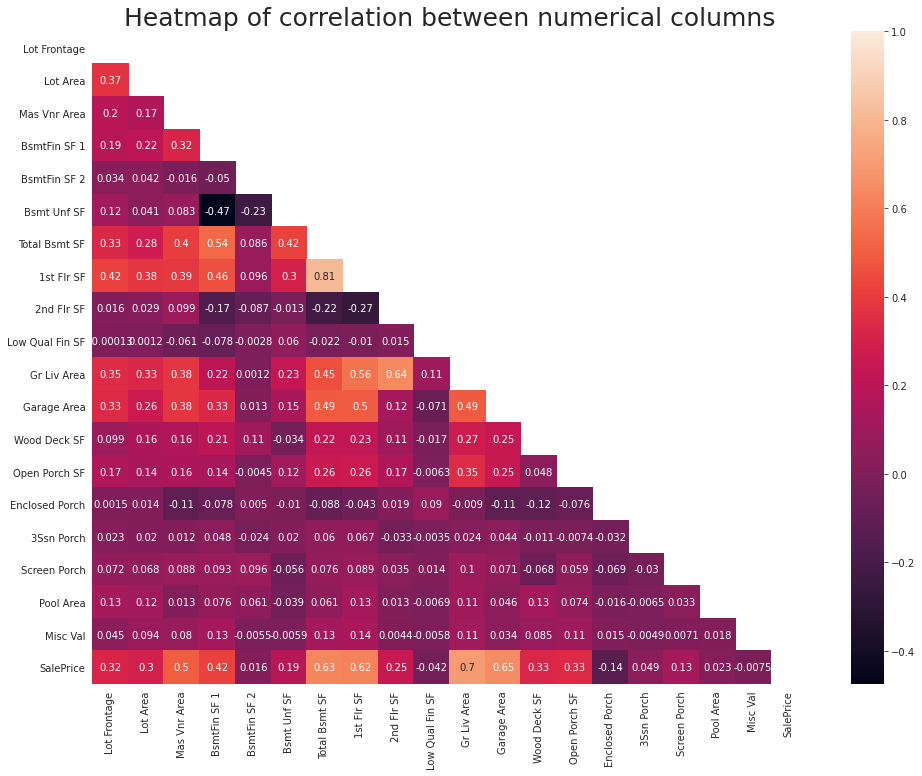

In [175]:
plt.figure(figsize=(16,12))

mask = np.zeros_like(numerical_vars.corr())
#mask 
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(numerical_vars.corr(),mask=mask, annot=True) 
    ax.set_title("Heatmap of correlation between numerical columns", fontsize=25);

In [176]:
numerical_vars.describe().transpose()

count           mean           std      min       25%  \
Lot Frontage     2049.0      68.871951     21.609428     21.0      59.0   
Lot Area         2049.0   10067.712055   6745.127386   1300.0    7500.0   
Mas Vnr Area     2049.0      98.722792    174.382527      0.0       0.0   
BsmtFin SF 1     2049.0     442.248902    461.310793      0.0       0.0   
BsmtFin SF 2     2049.0      47.982430    165.037776      0.0       0.0   
Bsmt Unf SF      2049.0     567.853587    445.027230      0.0     220.0   
Total Bsmt SF    2049.0    1058.084919    449.498894      0.0     793.0   
1st Flr SF       2049.0    1164.727672    396.565535    334.0     879.0   
2nd Flr SF       2049.0     329.218155    425.638942      0.0       0.0   
Low Qual Fin SF  2049.0       5.518302     51.093509      0.0       0.0   
Gr Liv Area      2049.0    1499.464129    500.461893    334.0    1130.0   
Garage Area      2049.0     473.766227    215.944850      0.0     319.0   
Wood Deck SF     2049.0      93.840410    128.583252      0.0       0.0   
Open Porch SF    2049.0      47.603221     66.763270      0.0       0.0   
Enclosed Porch   2049.0      22.490483     59.725692      0.0       0.0   
3Ssn Porch       2049.0       2.593948     25.241801      0.0       0.0   
Screen Porch     2049.0      16.527574     57.399890      0.0       0.0   
Pool Area        2049.0       2.400195     37.800940      0.0       0.0   
Misc Val         2049.0      51.624695    573.671628      0.0       0.0   
SalePrice        2049.0  181534.626159  79262.113026  12789.0  129850.0   

                          50%       75%       max  
Lot Frontage         66.95278      80.0     313.0  
Lot Area           9434.00000   11515.0  159000.0  
Mas Vnr Area          0.00000     160.0    1600.0  
BsmtFin SF 1        368.00000     734.0    5644.0  
BsmtFin SF 2          0.00000       0.0    1474.0  
Bsmt Unf SF         475.00000     811.0    2336.0  
Total Bsmt SF       995.00000    1319.0    6110.0  
1st Flr SF         1093.00000    1405.0    5095.0  
2nd Flr SF            0.00000     691.0    1862.0  
Low Qual Fin SF       0.00000       0.0    1064.0  
Gr Liv Area        1444.00000    1728.0    5642.0  
Garage Area         480.00000     576.0    1418.0  
Wood Deck SF          0.00000     168.0    1424.0  
Open Porch SF        27.00000      70.0     547.0  
Enclosed Porch        0.00000       0.0     432.0  
3Ssn Porch            0.00000       0.0     508.0  
Screen Porch          0.00000       0.0     490.0  
Pool Area             0.00000       0.0     800.0  
Misc Val              0.00000       0.0   17000.0  
SalePrice        162500.00000  214000.0  611657.0

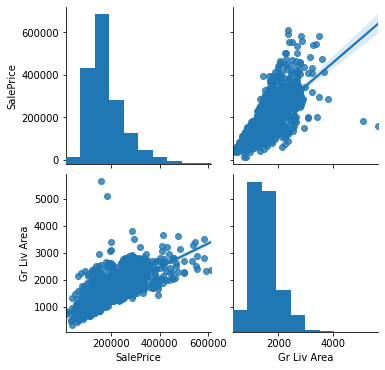

In [177]:
sns.pairplot(train[['SalePrice', 'Gr Liv Area']], kind='reg')

There appears to be a linear relationship between Gr Liv Area and Sale Price  

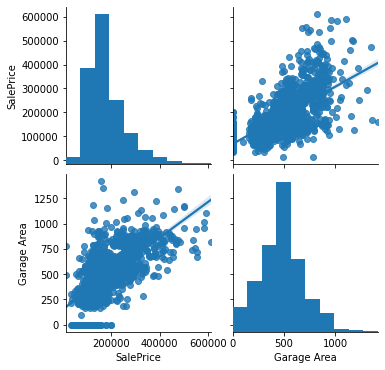

In [178]:
sns.pairplot(train[['SalePrice', 'Garage Area']], kind='reg')

There appears to be a linear relationship between Garage Area and Sale Price

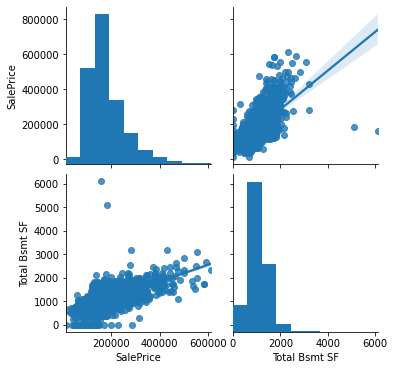

In [179]:
sns.pairplot(train[['SalePrice', 'Total Bsmt SF']], kind='reg')

There appears to be a linear relationship between Total Bsmt SF and Sale Price

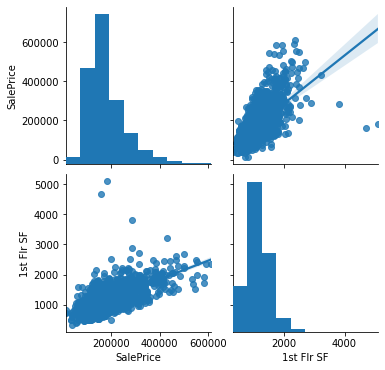

In [180]:
sns.pairplot(train[['SalePrice', '1st Flr SF']], kind='reg')

There appears to be a linear relationship between 1st Flr SF and Sale Price

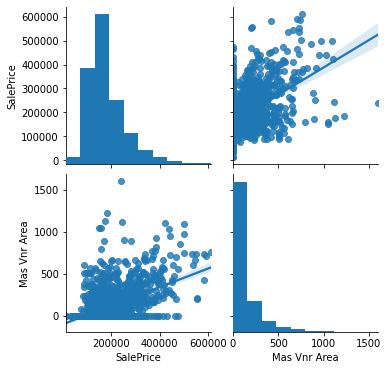

In [181]:
sns.pairplot(train[['SalePrice', 'Mas Vnr Area']], kind='reg')

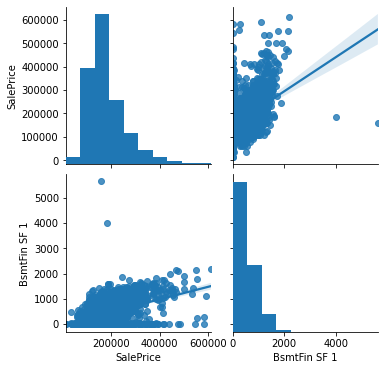

In [182]:
sns.pairplot(train[['SalePrice', 'BsmtFin SF 1']], kind='reg')

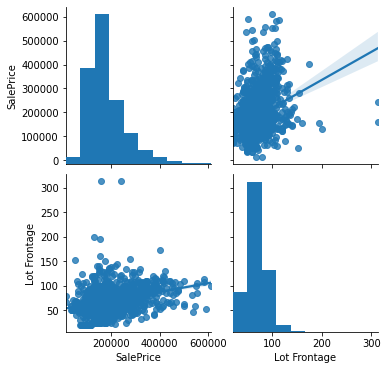

In [183]:
sns.pairplot(train[['SalePrice', 'Lot Frontage']], kind='reg')

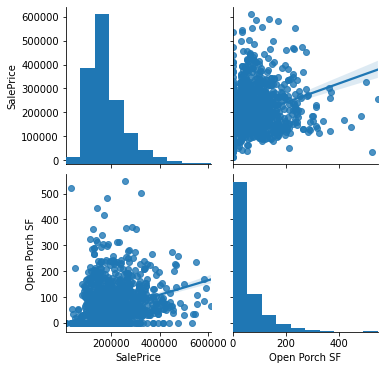

In [184]:
sns.pairplot(train[['SalePrice', 'Open Porch SF']], kind='reg')

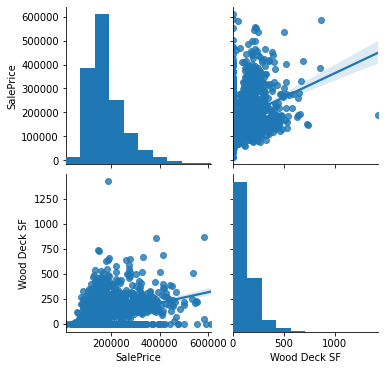

In [185]:
sns.pairplot(train[['SalePrice', 'Wood Deck SF']], kind='reg')

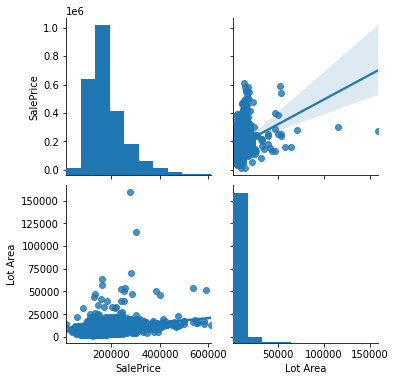

In [186]:
sns.pairplot(train[['SalePrice', 'Lot Area']], kind='reg')

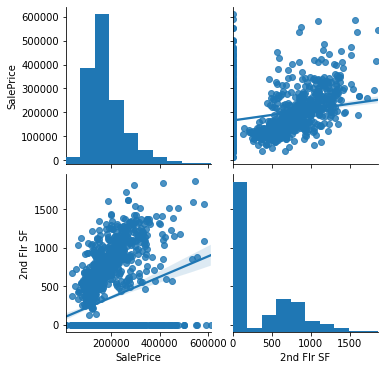

In [187]:
sns.pairplot(train[['SalePrice', '2nd Flr SF']], kind='reg')

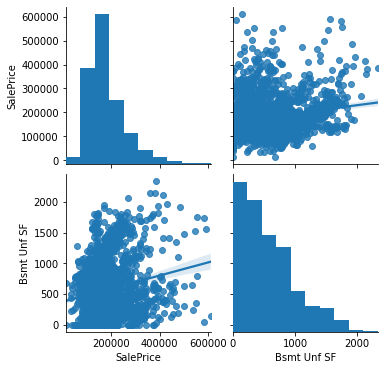

In [188]:
sns.pairplot(train[['SalePrice', 'Bsmt Unf SF']], kind='reg')

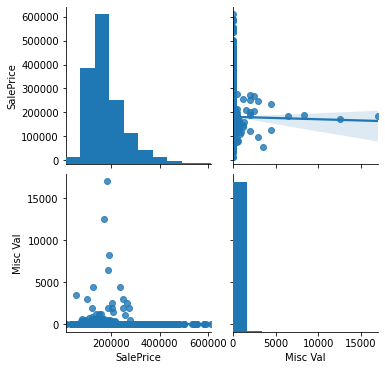

In [189]:
sns.pairplot(train[['SalePrice', 'Misc Val']], kind='reg')

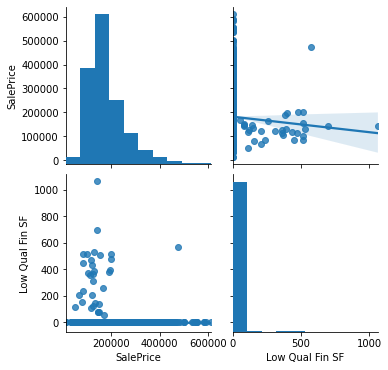

In [190]:
sns.pairplot(train[['SalePrice', 'Low Qual Fin SF']], kind='reg')

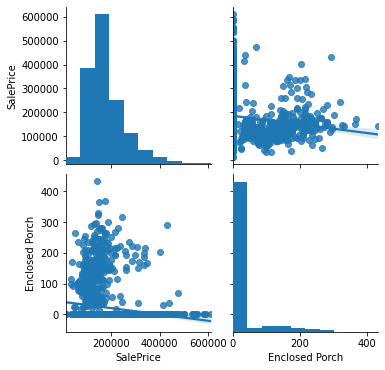

In [191]:
sns.pairplot(train[['SalePrice', 'Enclosed Porch']], kind='reg')

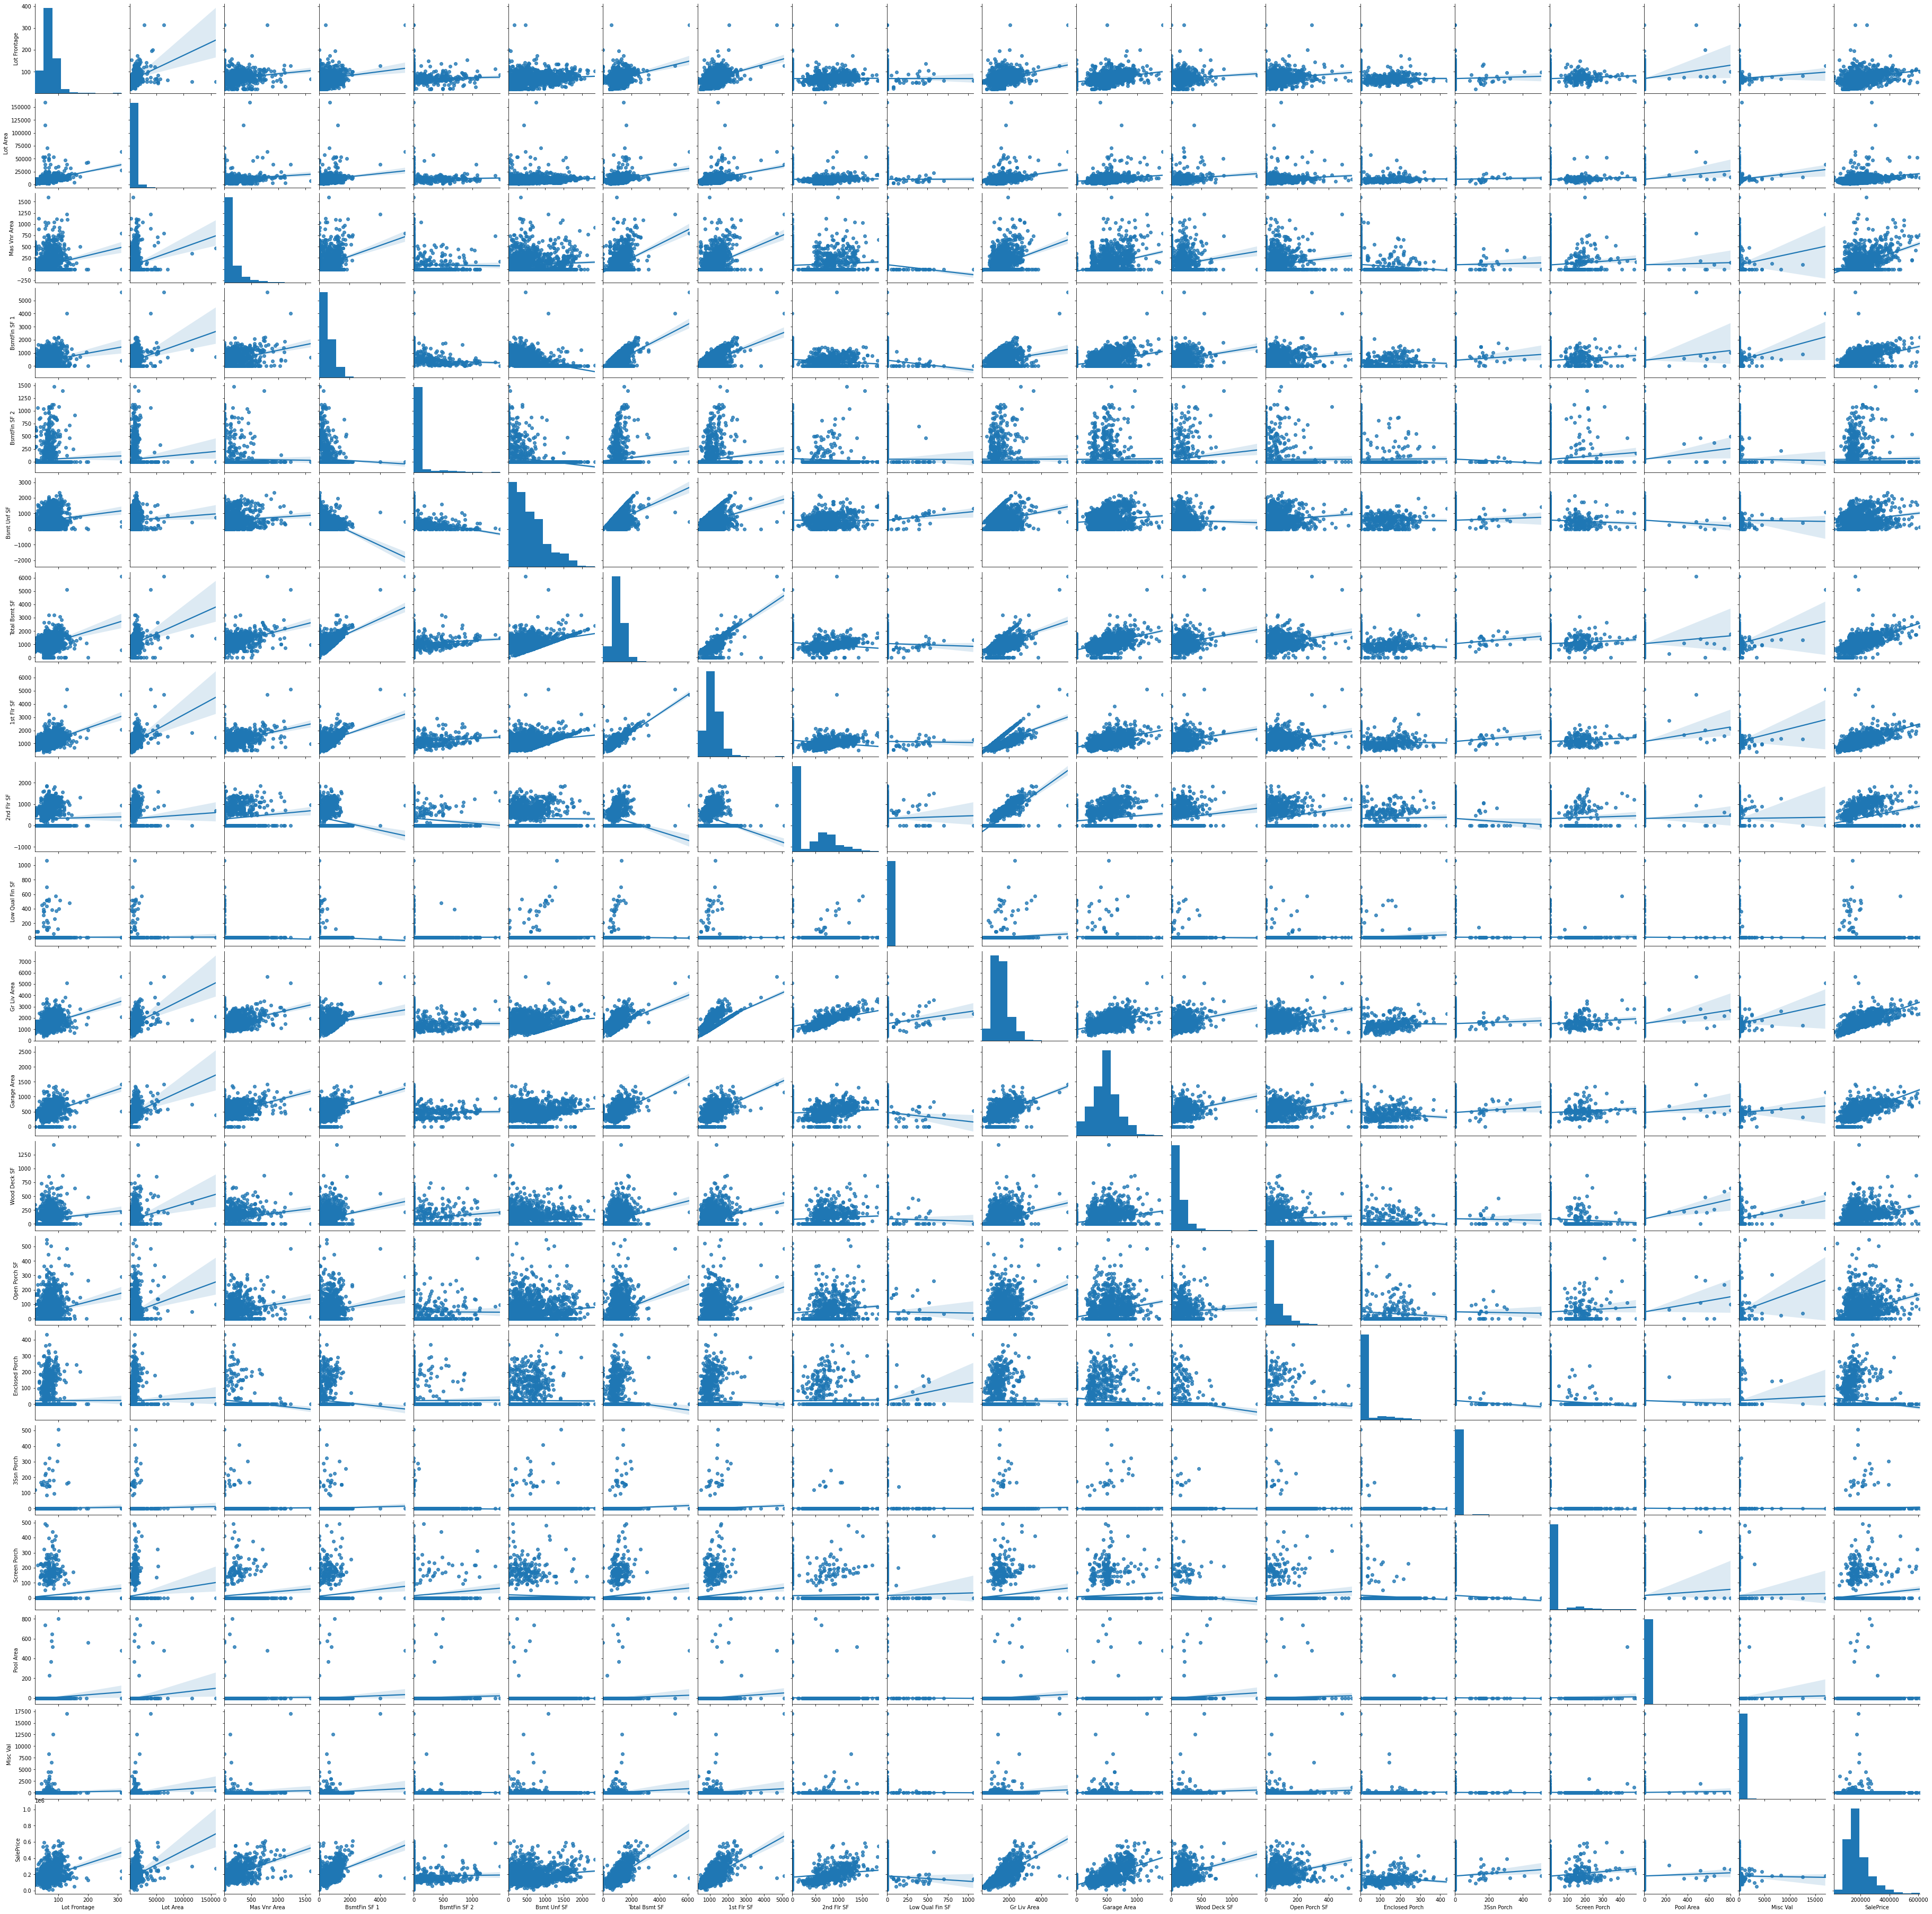

In [192]:
sns.pairplot(numerical_vars, kind='reg')

We can add 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF ' to our initial shortlist for features. 'Mas Vnr Area' has too many null values in the training dataset for it to be used as a reliable predictor.

## Categorical EDA

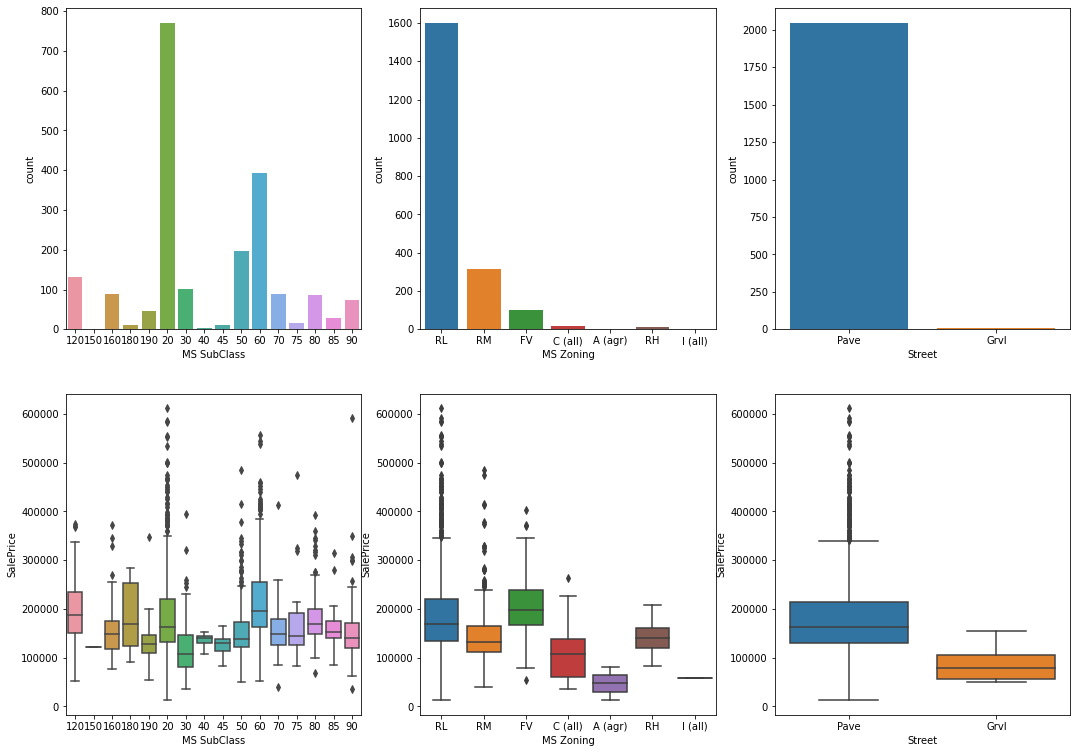

In [193]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='MS SubClass', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='MS Zoning', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Street', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='MS SubClass', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='MS Zoning', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Street', y=train['SalePrice'], ax=ax6)

MS SubClass - the popular subclass 20 (1-STORY 1946 & NEWER ALL STYLES), 50(1-1/2 STORY FINISHED ALL AGES) and 60 (2-STORY 1946 & NEWER) stand out as the more common types of dwelling in the Boston housing data set. Suggesting that majority of the properties are under 3 stories and there is something significant about properties built after 1946 and properties built before 1946. (no leads on outside research) 

In [194]:
train.groupby('MS SubClass')['Year Built', 'Year Remod/Add'].count()

/Users/johnsmith/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Year Built  Year Remod/Add
MS SubClass                            
120                 132             132
150                   1               1
160                  88              88
180                  11              11
190                  46              46
20                  769             769
30                  101             101
40                    4               4
45                   11              11
50                  198             198
60                  394             394
70                   89              89
75                   16              16
80                   86              86
85                   28              28
90                   75              75

In [195]:
train.loc[(train['MS SubClass']=='20') & (train['Year Built']<1946), ['MS SubClass',
                                      'Year Built',
                                      'Year Remod/Add']]

MS SubClass  Year Built  Year Remod/Add
1107          20        1938            1958

In [196]:
train.loc[(train['MS SubClass']=='60') & (train['Year Built']<1946), ['MS SubClass',
                                      'Year Built',
                                      'Year Remod/Add']]

MS SubClass  Year Built  Year Remod/Add
131          60        1939            2006

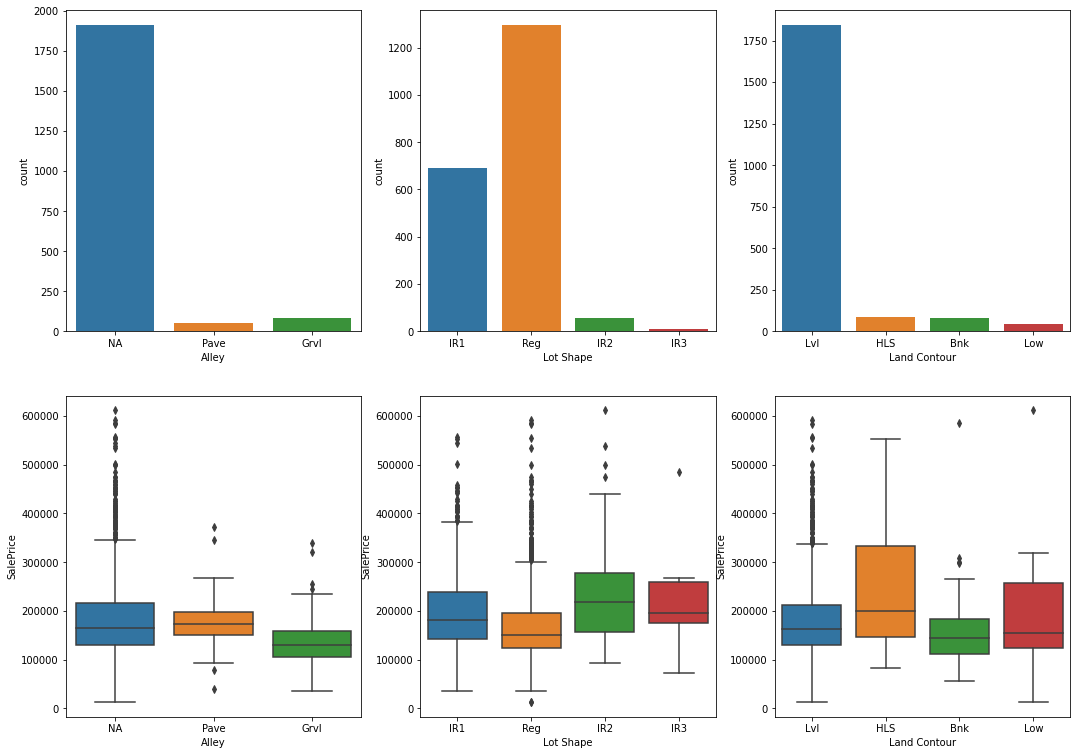

In [197]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Alley', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Lot Shape', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Land Contour', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Alley', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Lot Shape', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Land Contour', y=train['SalePrice'], ax=ax6)

In [198]:
train['Land Contour'].value_counts()

Lvl    1841
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64

Lot Contour - if your property is on a hillside (HLS), we are seeing a higher IQR range of sale prices but the properties sold in this category account for just about 4 percent of all sales.

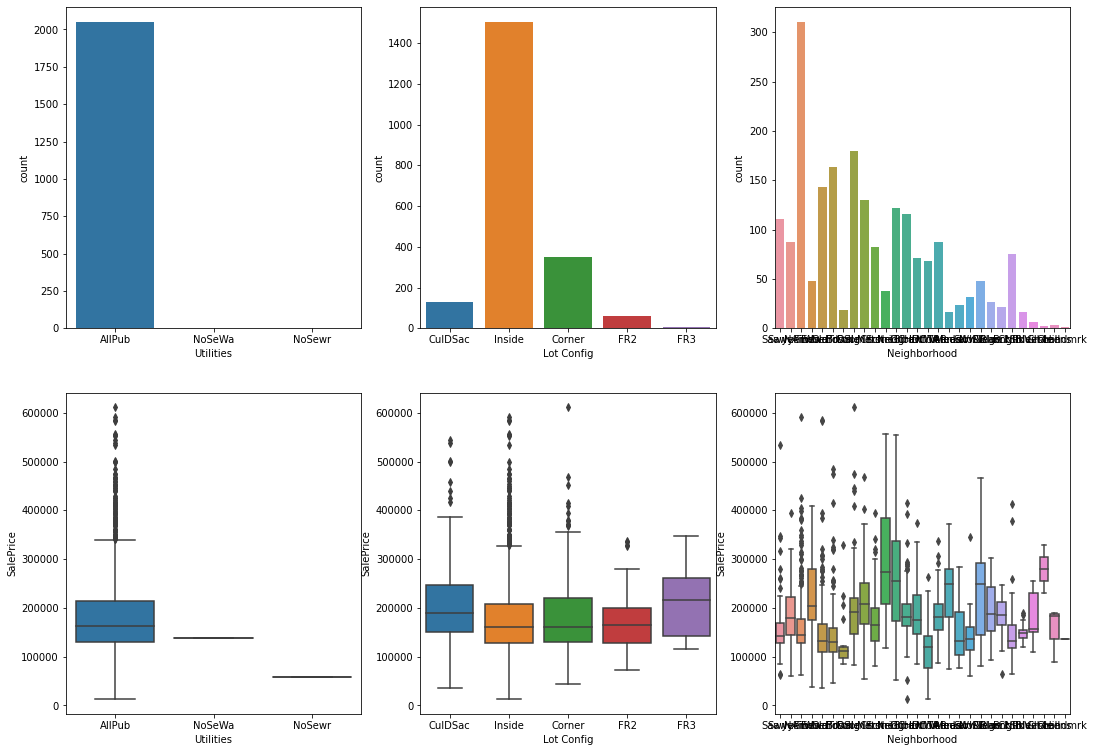

In [199]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Utilities', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Lot Config', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Neighborhood', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Utilities', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Lot Config', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Neighborhood', y=train['SalePrice'], ax=ax6)

[Text(0, 0, 'Sawyer'),
 Text(0, 0, 'SawyerW'),
 Text(0, 0, 'NAmes'),
 Text(0, 0, 'Timber'),
 Text(0, 0, 'Edwards'),
 Text(0, 0, 'OldTown'),
 Text(0, 0, 'BrDale'),
 Text(0, 0, 'CollgCr'),
 Text(0, 0, 'Somerst'),
 Text(0, 0, 'Mitchel'),
 Text(0, 0, 'StoneBr'),
 Text(0, 0, 'NridgHt'),
 Text(0, 0, 'Gilbert'),
 Text(0, 0, 'Crawfor'),
 Text(0, 0, 'IDOTRR'),
 Text(0, 0, 'NWAmes'),
 Text(0, 0, 'Veenker'),
 Text(0, 0, 'MeadowV'),
 Text(0, 0, 'SWISU'),
 Text(0, 0, 'NoRidge'),
 Text(0, 0, 'ClearCr'),
 Text(0, 0, 'Blmngtn'),
 Text(0, 0, 'BrkSide'),
 Text(0, 0, 'NPkVill'),
 Text(0, 0, 'Blueste'),
 Text(0, 0, 'GrnHill'),
 Text(0, 0, 'Greens'),
 Text(0, 0, 'Landmrk')]

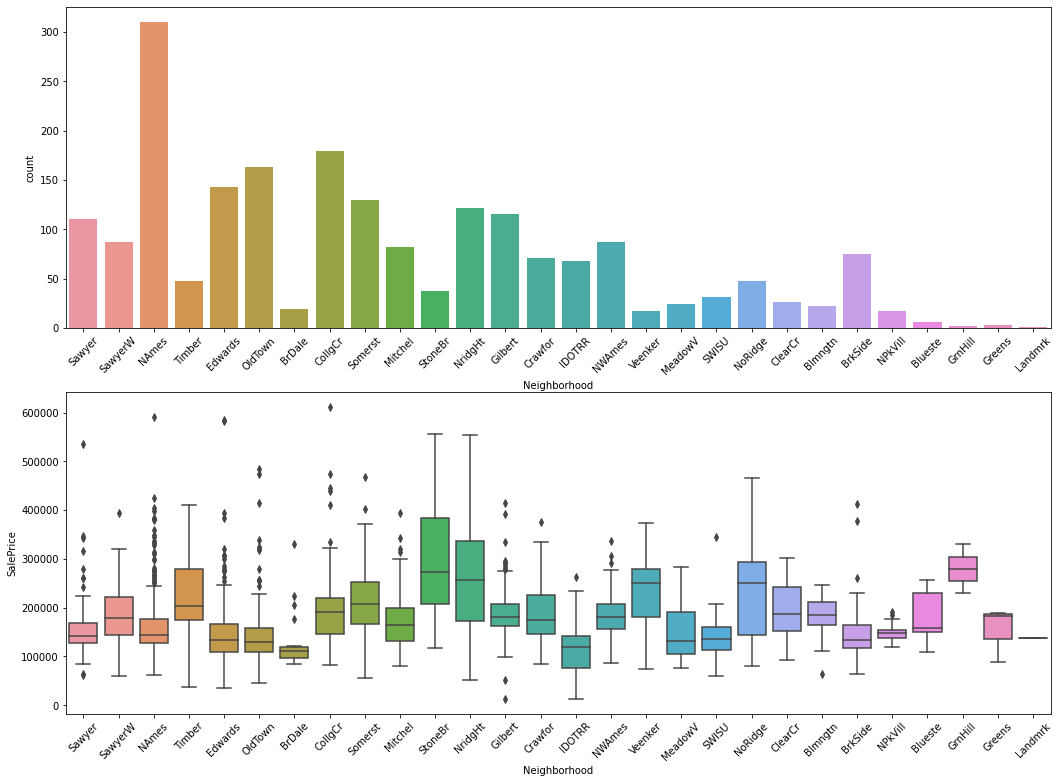

In [200]:
fig = plt.figure(figsize = (60,13))

ax1 = fig.add_subplot(2,3,1)
chart = sns.countplot(data = categorical, x='Neighborhood', ax=ax1)
ax1.set_xticklabels(chart.get_xticklabels(), rotation=45)

ax2 = fig.add_subplot(2,3,4)
chart = sns.boxplot(data = categorical, x='Neighborhood', y=train['SalePrice'], ax=ax2)
ax2.set_xticklabels(chart.get_xticklabels(), rotation=45)

We can see that there are some neighbourhoods that command a higher sale price than others, in particular 'StoneBR,  'NridgHT', 'NoRidge' and 'GrnHill'. 

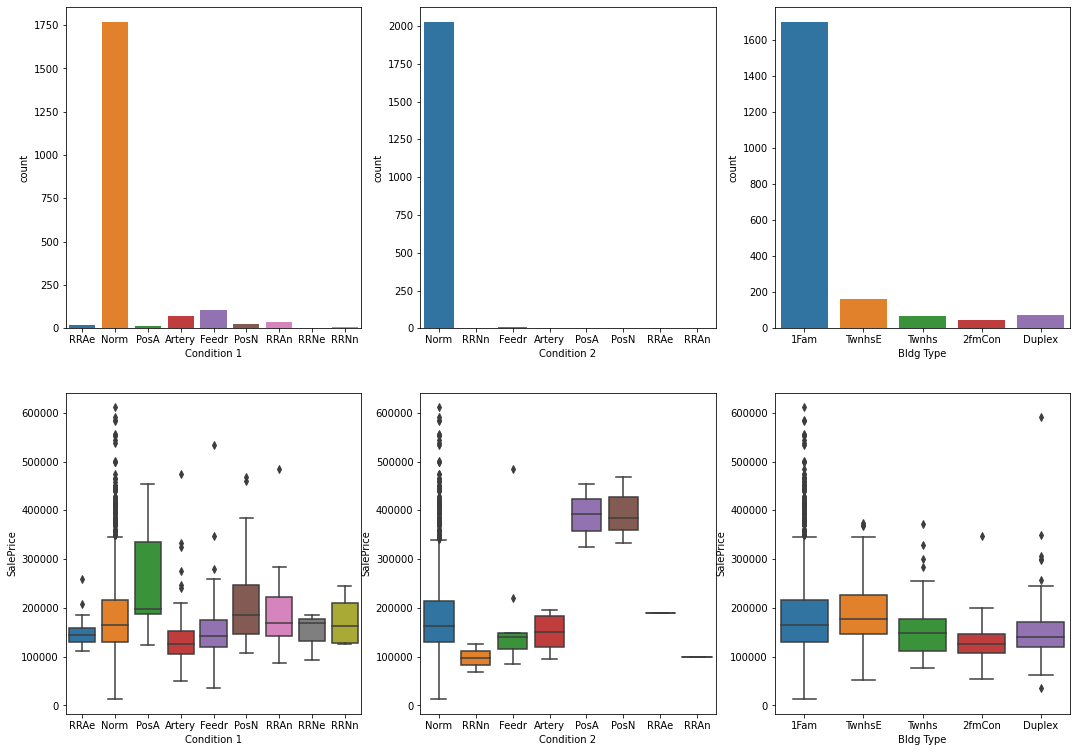

In [201]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Condition 1', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Condition 2', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Bldg Type', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Condition 1', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Condition 2', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Bldg Type', y=train['SalePrice'], ax=ax6)

PosN (Near positive off-site feature--park, greenbelt, etc.) and PosA (Adjacent to postive off-site feature) in condition 1 and 2 look to have a positive effect on sale price, the effects of the other conditions are less noticeable. But the sample size of Condition 2 is too small to train on. 

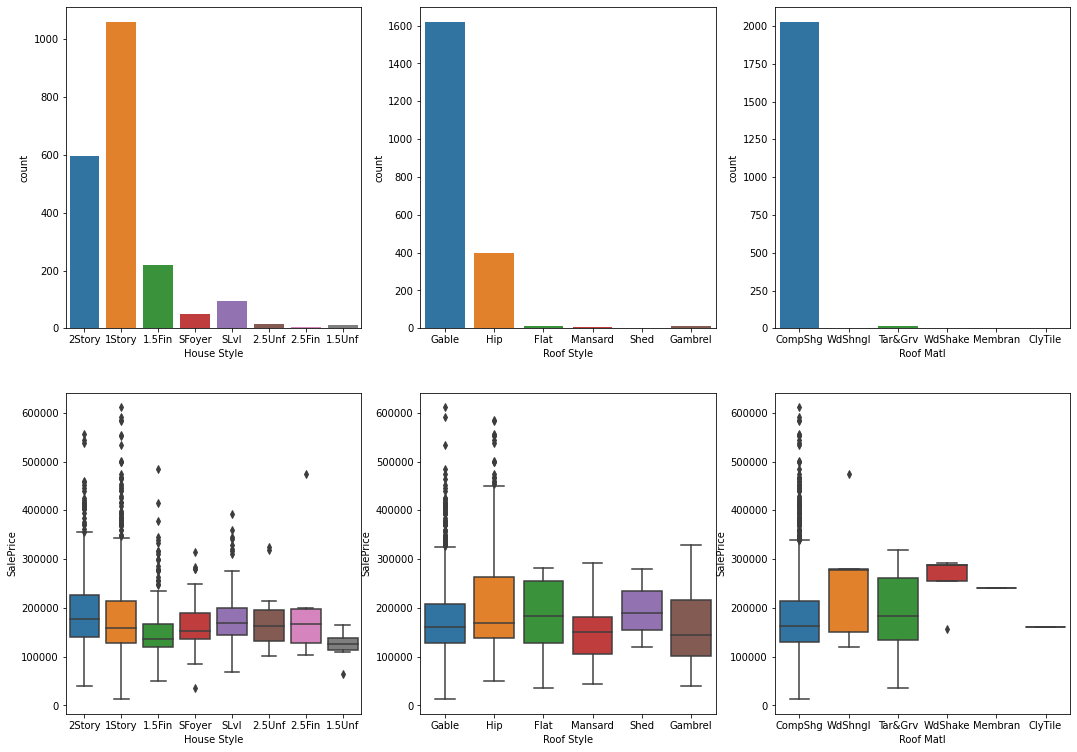

In [202]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='House Style', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Roof Style', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Roof Matl', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='House Style', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Roof Style', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Roof Matl', y=train['SalePrice'], ax=ax6)

Roof Materials and especially wood shakes seem to have a positive effect on sale prices.

[Text(0, 0, 'Plywood'),
 Text(0, 0, 'VinylSd'),
 Text(0, 0, 'Wd Sdng'),
 Text(0, 0, 'HdBoard'),
 Text(0, 0, 'MetalSd'),
 Text(0, 0, 'AsbShng'),
 Text(0, 0, 'CmentBd'),
 Text(0, 0, 'Wd Shng'),
 Text(0, 0, 'BrkFace'),
 Text(0, 0, 'Stucco'),
 Text(0, 0, 'Brk Cmn'),
 Text(0, 0, 'ImStucc'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'CBlock'),
 Text(0, 0, 'AsphShn')]

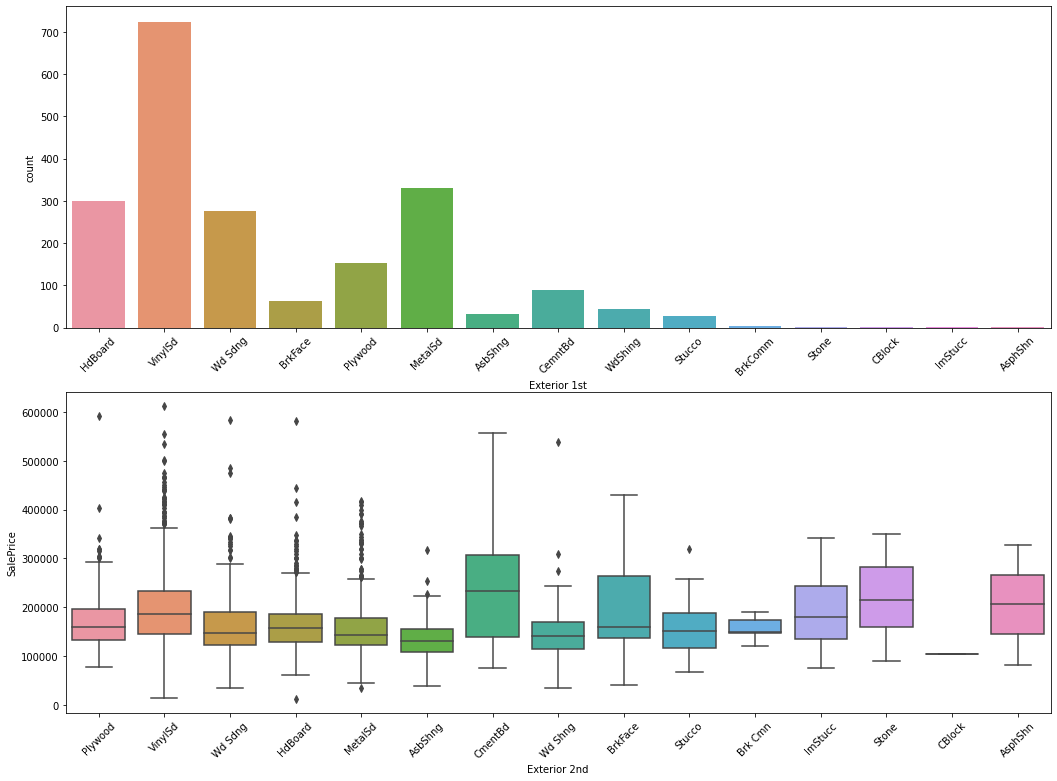

In [203]:
fig = plt.figure(figsize = (60,13))

ax1 = fig.add_subplot(2,3,1)
chart = sns.countplot(data = categorical, x='Exterior 1st', ax=ax1)
ax1.set_xticklabels(chart.get_xticklabels(), rotation=45)

ax2 = fig.add_subplot(2,3,4)
chart = sns.boxplot(data = categorical, x='Exterior 2nd', y=train['SalePrice'], ax=ax2)
ax2.set_xticklabels(chart.get_xticklabels(), rotation=45)

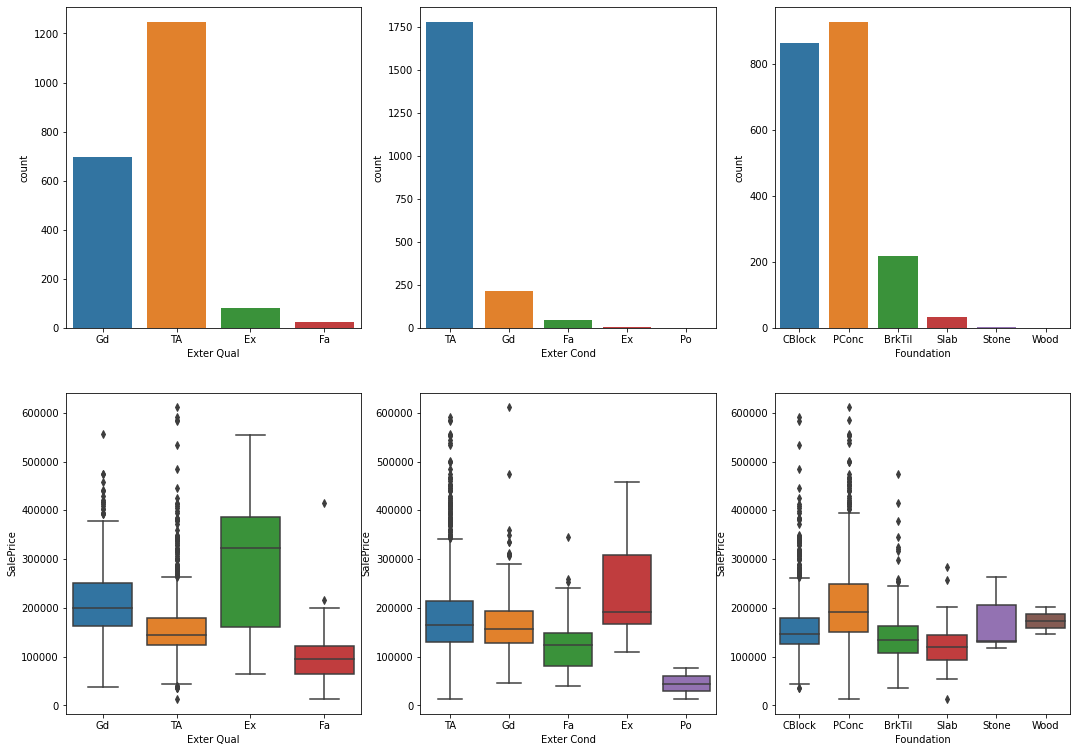

In [204]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Exter Qual', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Exter Cond', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Foundation', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Exter Qual', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Exter Cond', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Foundation', y=train['SalePrice'], ax=ax6)

Exter Qual - having Excellent rating has a positive effect on sale price

Exter Cond - having Exellent rating has a positive effect on sale price

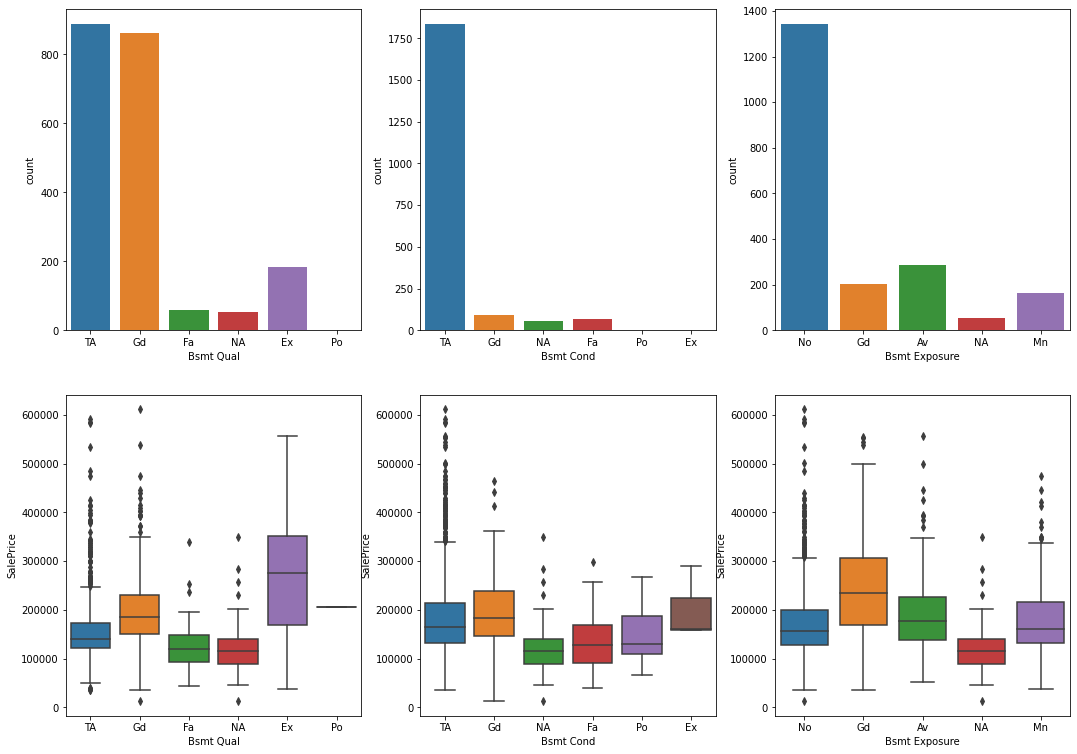

In [205]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Bsmt Qual', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Bsmt Cond', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Bsmt Exposure', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Bsmt Qual', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Bsmt Cond', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Bsmt Exposure', y=train['SalePrice'], ax=ax6)

Bsmt Qual - having Excellent rating where height of ceiling if over 100 inches has a positive effect on sale price

Bsmt Exposure - having good exposure to a walkout or garden level walls has positive effect on sale price

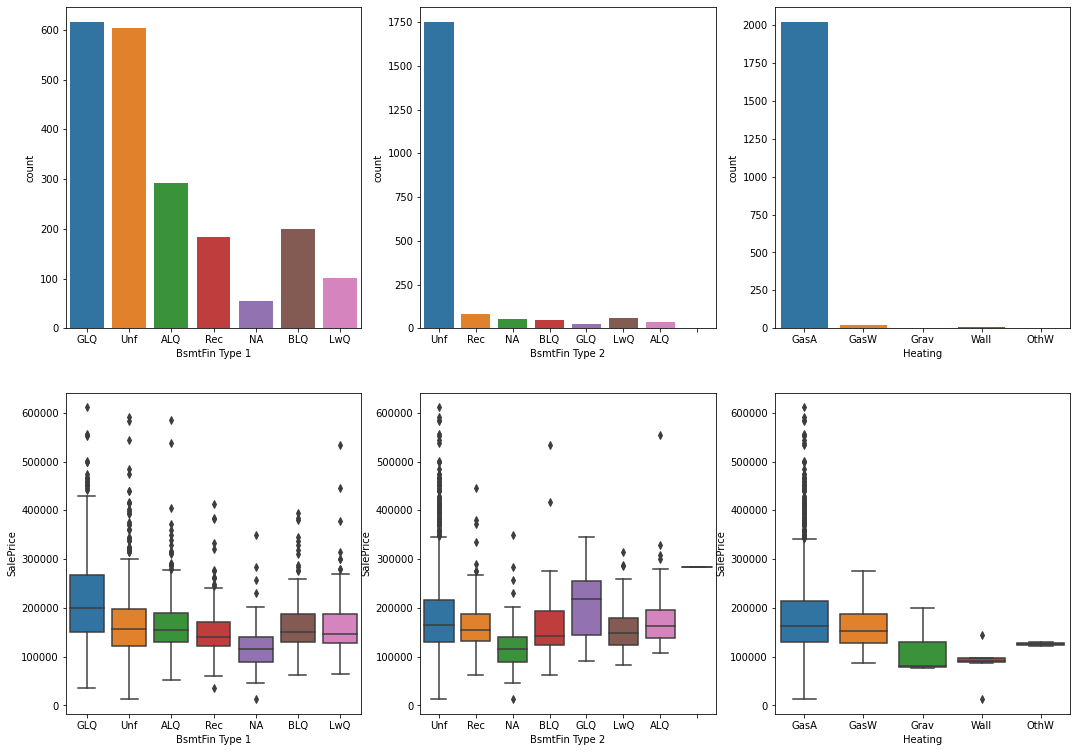

In [206]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='BsmtFin Type 1', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='BsmtFin Type 2', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Heating', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='BsmtFin Type 1', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='BsmtFin Type 2', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Heating', y=train['SalePrice'], ax=ax6)

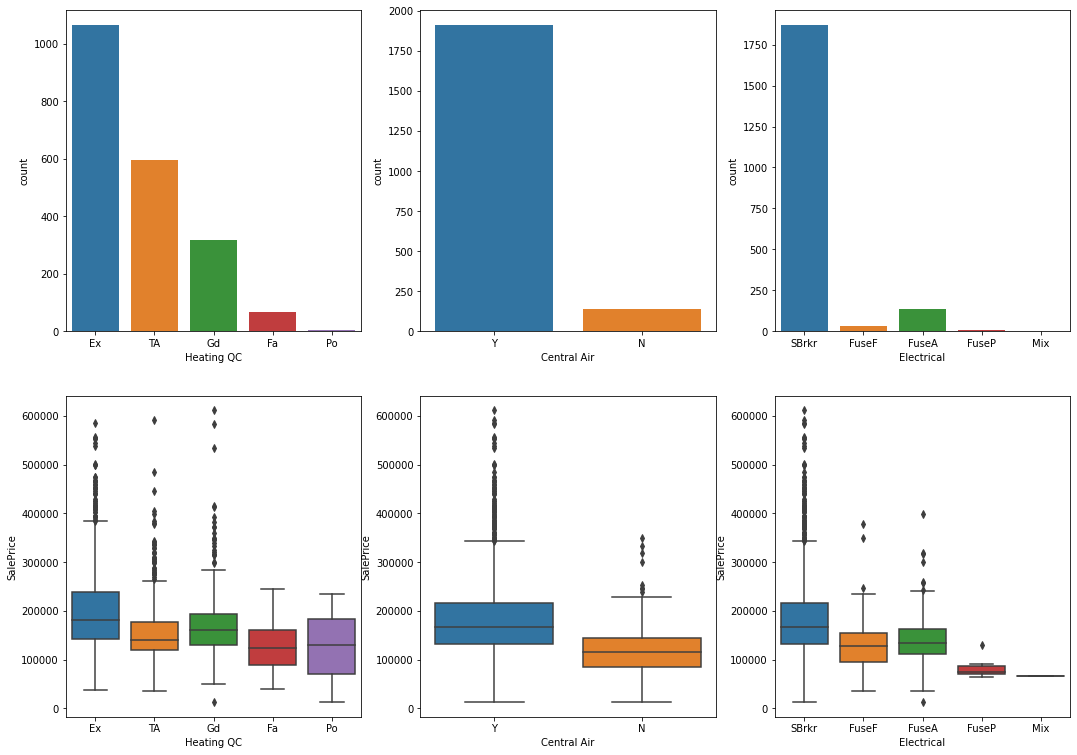

In [207]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Heating QC', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Central Air', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Electrical', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Heating QC', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Central Air', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Electrical', y=train['SalePrice'], ax=ax6)

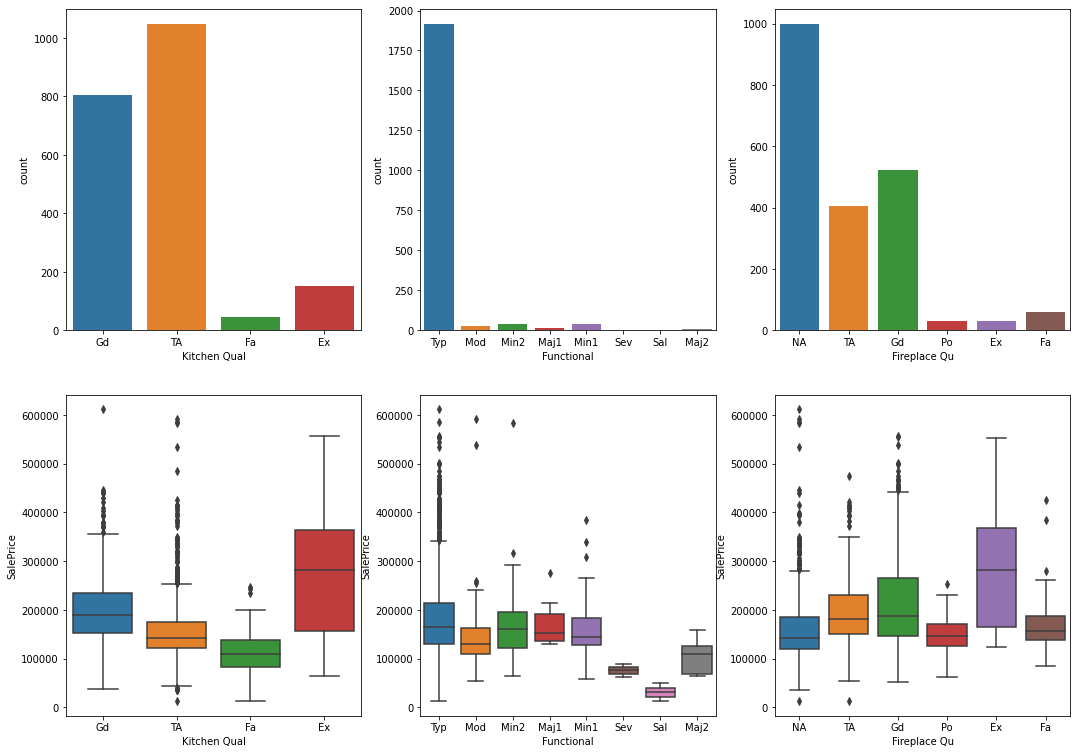

In [208]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Kitchen Qual', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Functional', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Fireplace Qu', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Kitchen Qual', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Functional', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Fireplace Qu', y=train['SalePrice'], ax=ax6)

Kitchen Qual - excellent quality has a positive effect on sale price

Functional - having a rating here of Sev (severely damaged) or Sal (salvage only) has a negative effect on sale price

Fireplace Qual - excellent quality has a positive effect on sale price

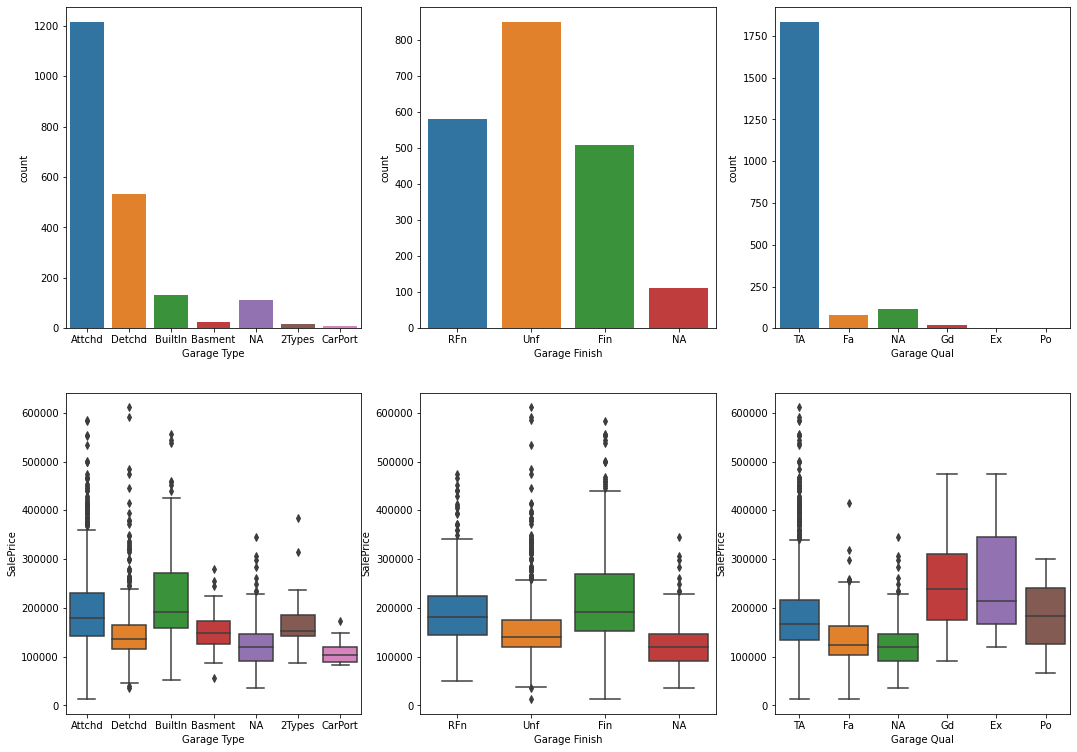

In [209]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Garage Type', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Garage Finish', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Garage Qual', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Garage Type', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Garage Finish', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Garage Qual', y=train['SalePrice'], ax=ax6)

Garage Qual - Excellent or Good rating here will likely have a positive effect on sale price

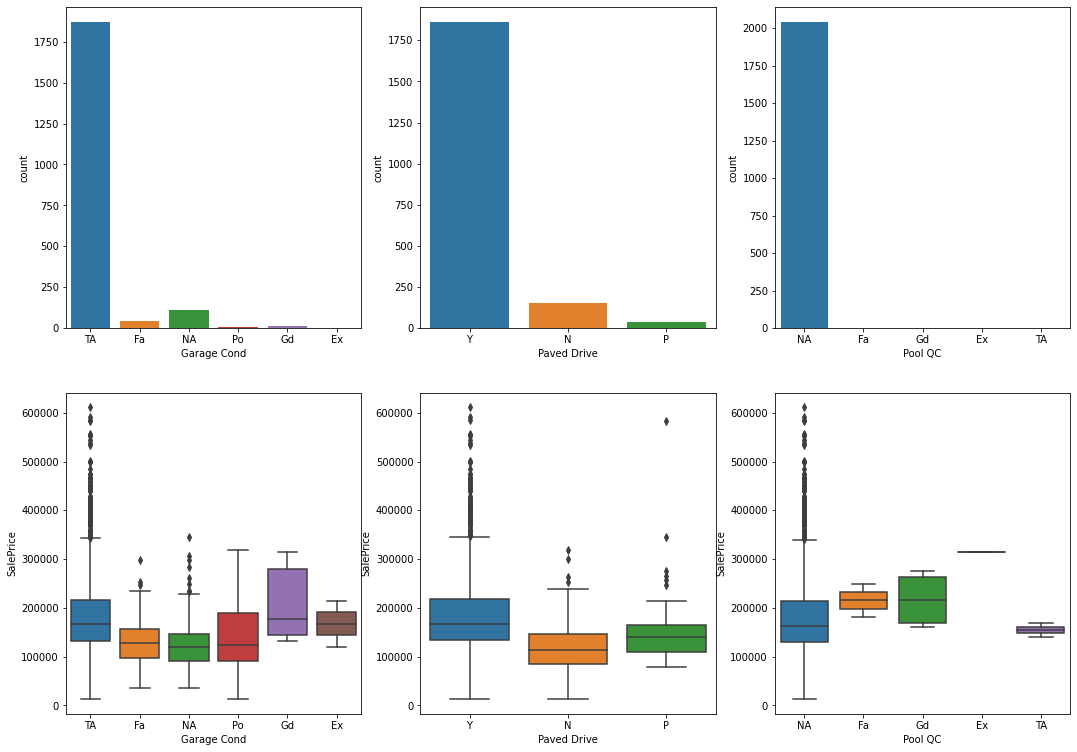

In [210]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Garage Cond', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Paved Drive', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Pool QC', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Garage Cond', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Paved Drive', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Pool QC', y=train['SalePrice'], ax=ax6)

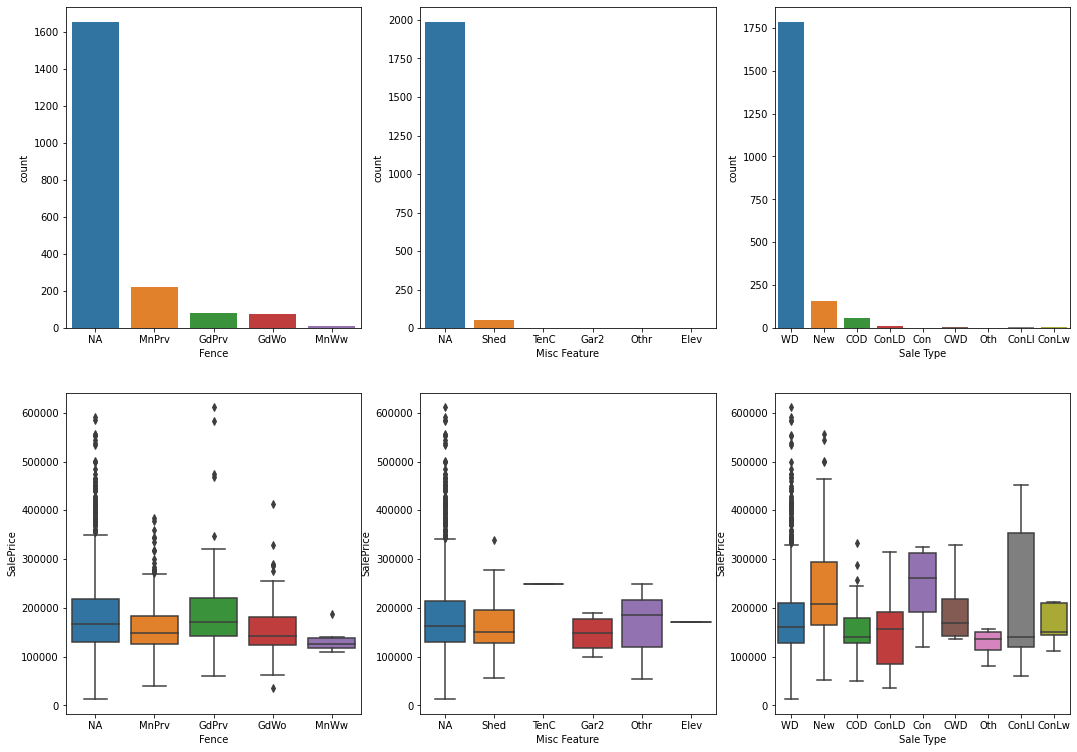

In [211]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Fence', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Misc Feature', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Sale Type', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Fence', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Misc Feature', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Sale Type', y=train['SalePrice'], ax=ax6)

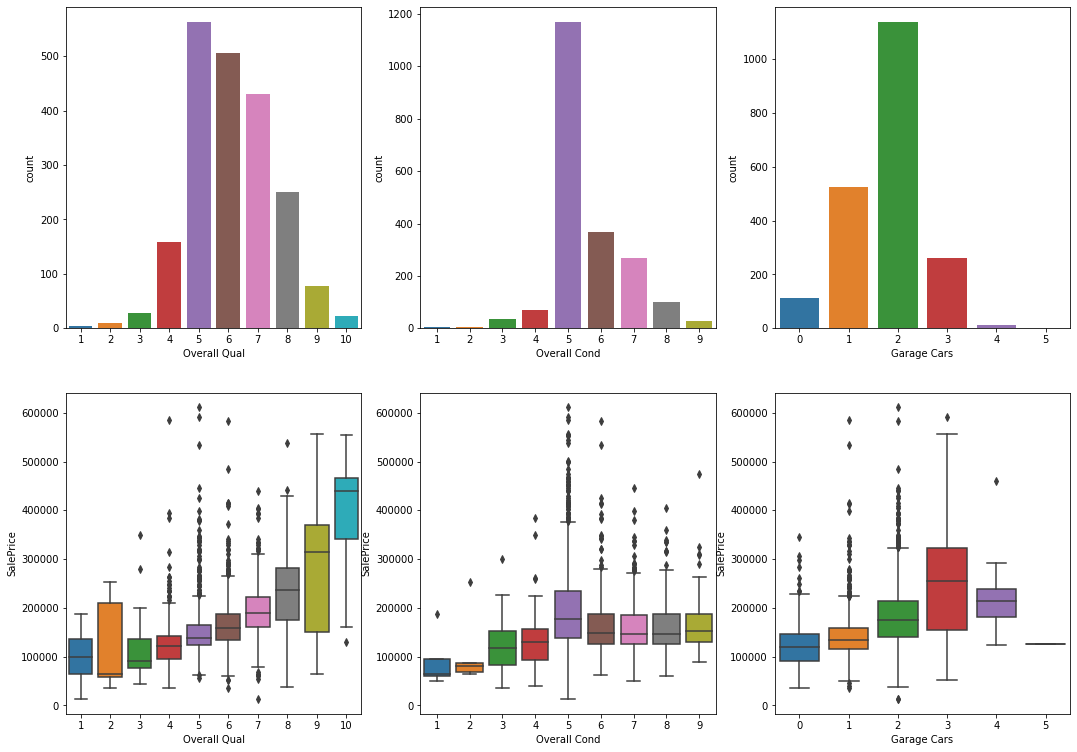

In [212]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Overall Qual', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Overall Cond', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Garage Cars', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Overall Qual', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Overall Cond', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Garage Cars', y=train['SalePrice'], ax=ax6)

Overal Qual - looks to have a strong linear correlation to sale price as the ratings increase

Garage Cars - having a garage that can fit 3 cars looks to have a positive effect on sale price

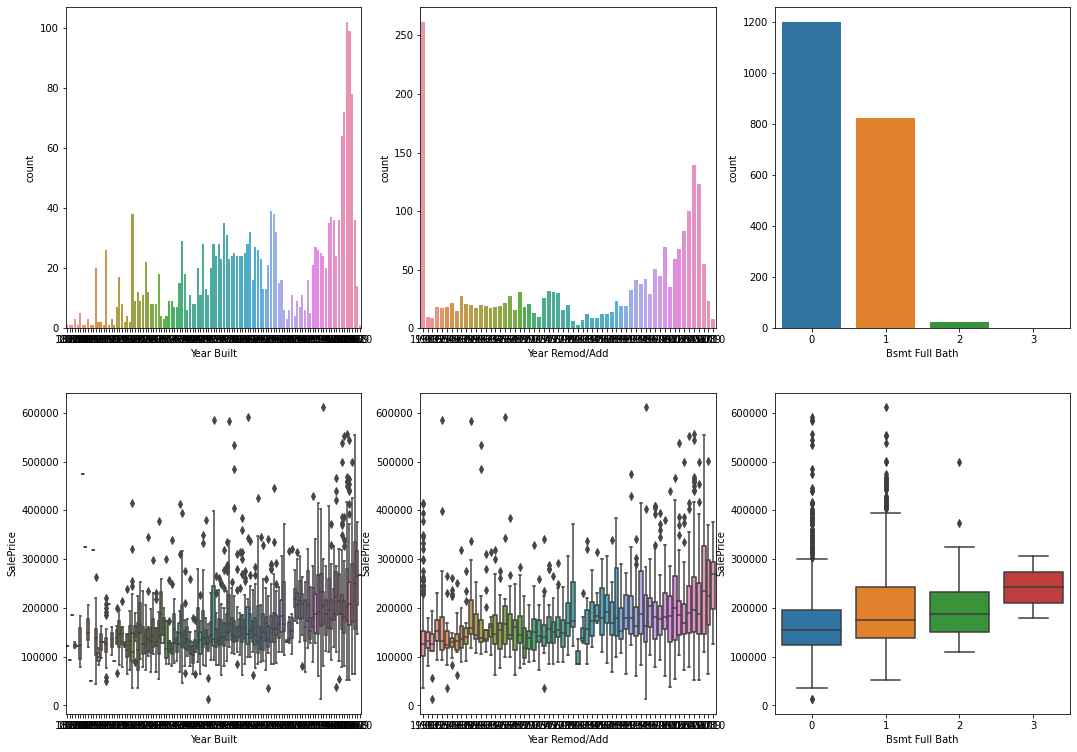

In [213]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Year Built', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Year Remod/Add', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Bsmt Full Bath', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Year Built', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Year Remod/Add', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Bsmt Full Bath', y=train['SalePrice'], ax=ax6)

Year Built - Newer homes as seen in Year Built and Year Remod/Add look to command a slightly higher price. 

Bsmt Full Bath - having more full bathrooms in the basement looks to have a postive effect on sale price

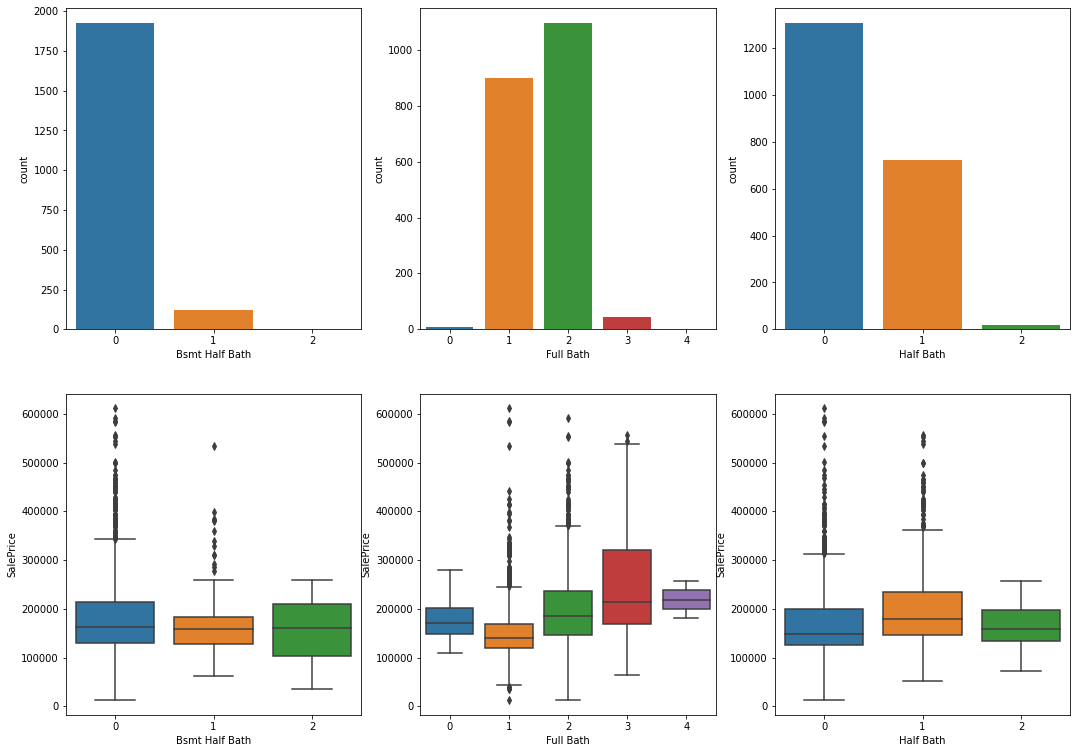

In [214]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Bsmt Half Bath', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Full Bath', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Half Bath', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Bsmt Half Bath', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Full Bath', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Half Bath', y=train['SalePrice'], ax=ax6)

Full Bath - having more full bathrooms looks to have a postive effect on sale price

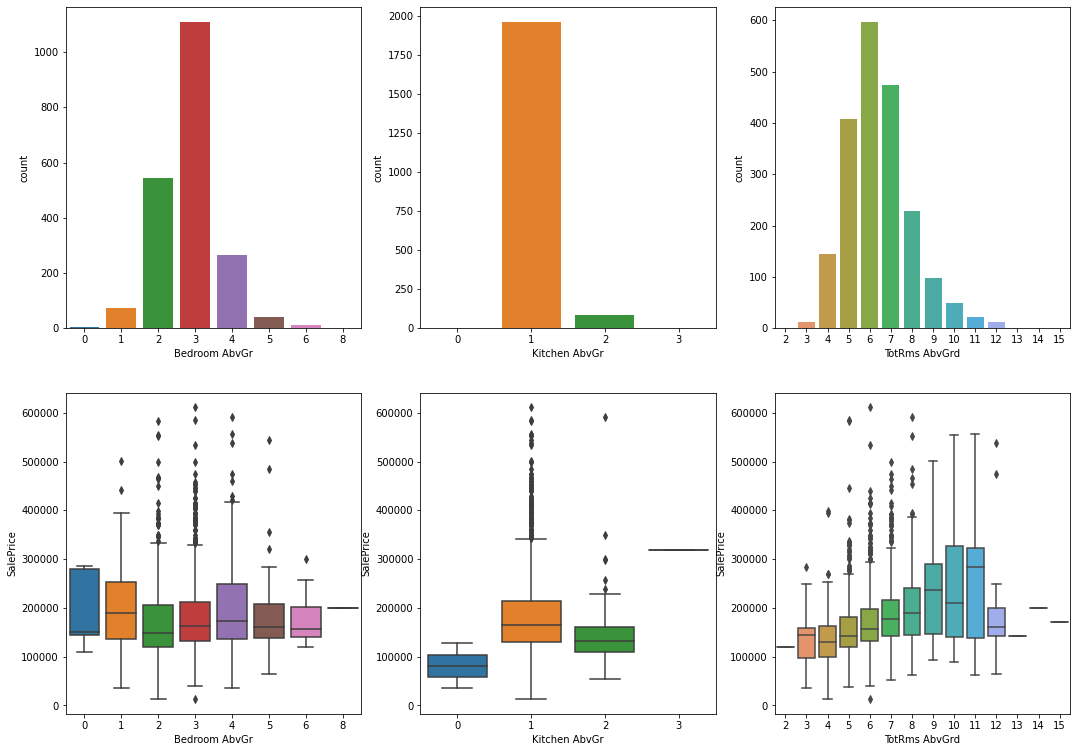

In [215]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Bedroom AbvGr', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Kitchen AbvGr', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='TotRms AbvGrd', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Bedroom AbvGr', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Kitchen AbvGr', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='TotRms AbvGrd', y=train['SalePrice'], ax=ax6)

TotRms AbvGrd - having more rooms above the ground level looks to have a positive effect on sale price

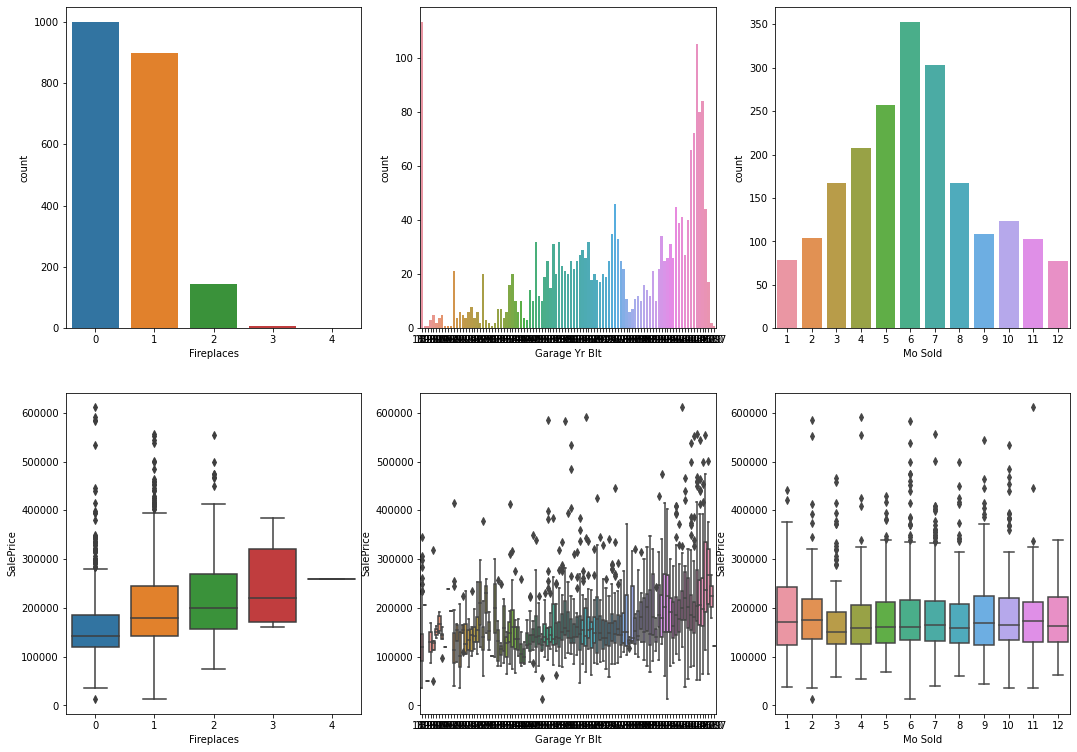

In [216]:
fig = plt.figure(figsize = (18,13))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = categorical, x='Fireplaces', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = categorical, x='Garage Yr Blt', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = categorical, x='Mo Sold', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.boxplot(data = categorical, x='Fireplaces', y=train['SalePrice'], ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.boxplot(data = categorical, x='Garage Yr Blt', y=train['SalePrice'], ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.boxplot(data = categorical, x='Mo Sold', y=train['SalePrice'], ax=ax6)

Fireplaces - having more fireplaces looks to have a positive effect on sale price

Here is the Features shortlist for categorical, 'Lot Shape' 'Neighborhood' 'Condition 1' 'Condition 2' 'Roof Matl' 'Bsmt Qual' 'Bsmt Exposure' 'Kitchen Qual' 'Functional' 'Fireplace Qual'  'Overal Qual' 'Garage Cars' 'Bsmt Full Bath''Full Bath' 'TotRms AbvGrd' 'Exter Qual' 'Exter Cond' 'Year Built'

#see what can be done about condition 1 and 2 since it is the same ordinal scale, dropping condition 2 since it has low variance that we can try our model on and it is highly collinear with Condition 1.
#might also drop Roof Matl since the distribution is very skewed towards one material. 

In [217]:
categorical_stats

column                                             values  \
0              Id  [109, 544, 153, 318, 255, 138, 2827, 145, 1942...   
0             PID  [533352170, 531379050, 535304180, 916386060, 9...   
0     MS SubClass  [60, 20, 50, 180, 160, 70, 120, 190, 85, 30, 9...   
0       MS Zoning        [RL, RM, FV, C (all), A (agr), RH, I (all)]   
0    Lot Frontage  [, 43, 68, 73, 82, 137, 35, 70, 21, 64, 120, 2...   
0          Street                                       [Pave, Grvl]   
0           Alley                                   [NA, Pave, Grvl]   
0       Lot Shape                               [IR1, Reg, IR2, IR3]   
0    Land Contour                               [Lvl, HLS, Bnk, Low]   
0       Utilities                           [AllPub, NoSeWa, NoSewr]   
0      Lot Config                [CulDSac, Inside, Corner, FR2, FR3]   
0      Land Slope                                    [Gtl, Sev, Mod]   
0    Neighborhood  [Sawyer, SawyerW, NAmes, Timber, Edwards, OldT...   
0     Condition 1  [RRAe, Norm, PosA, Artery, Feedr, PosN, RRAn, ...   
0     Condition 2  [Norm, RRNn, Feedr, Artery, PosA, PosN, RRAe, ...   
0       Bldg Type              [1Fam, TwnhsE, Twnhs, 2fmCon, Duplex]   
0     House Style  [2Story, 1Story, 1.5Fin, SFoyer, SLvl, 2.5Unf,...   
0      Roof Style         [Gable, Hip, Flat, Mansard, Shed, Gambrel]   
0       Roof Matl  [CompShg, WdShngl, Tar&Grv, WdShake, Membran, ...   
0    Exterior 1st  [HdBoard, VinylSd, Wd Sdng, BrkFace, Plywood, ...   
0    Exterior 2nd  [Plywood, VinylSd, Wd Sdng, HdBoard, MetalSd, ...   
0    Mas Vnr Type                   [BrkFace, None, , Stone, BrkCmn]   
0    Mas Vnr Area  [289, 132, 0, 82, 180, 192, 232, 456, 148, , 3...   
0      Exter Qual                                   [Gd, TA, Ex, Fa]   
0      Exter Cond                               [TA, Gd, Fa, Ex, Po]   
0      Foundation         [CBlock, PConc, BrkTil, Slab, Stone, Wood]   
0       Bsmt Qual                         [TA, Gd, Fa, NA, Ex, , Po]   
0       Bsmt Cond                         [TA, Gd, NA, Fa, Po, Ex, ]   
0   Bsmt Exposure                             [No, Gd, Av, NA, Mn, ]   
0  BsmtFin Type 1               [GLQ, Unf, ALQ, Rec, NA, BLQ, LwQ, ]   
0    BsmtFin SF 1  [533, 637, 731, 0, 247, 547, 1000, 292, 650, 3...   
0  BsmtFin Type 2               [Unf, Rec, NA, BLQ, GLQ, LwQ, ALQ, ]   
0    BsmtFin SF 2  [0, 713, 117, 1057, 173, 290, 420, 469, 42, 95...   
0     Bsmt Unf SF  [192, 276, 326, 384, 676, 557, 0, 188, 632, 39...   
0   Total Bsmt SF  [725, 913, 1057, 384, 676, 1517, 547, 1188, 92...   
0         Heating                     [GasA, GasW, Grav, Wall, OthW]   
0      Heating QC                               [Ex, TA, Gd, Fa, Po]   
0     Central Air                                             [Y, N]   
0      Electrical                  [SBrkr, FuseF, FuseA, FuseP, Mix]   
0  Bsmt Full Bath                                     [0, 1, 2, , 3]   
0  Bsmt Half Bath                                        [0, 1, , 2]   
0    Kitchen Qual                                   [Gd, TA, Fa, Ex]   
0      Functional       [Typ, Mod, Min2, Maj1, Min1, Sev, Sal, Maj2]   
0    Fireplace Qu                           [NA, TA, Gd, Po, Ex, Fa]   
0     Garage Type  [Attchd, Detchd, BuiltIn, Basment, NA, 2Types,...   
0   Garage Yr Blt  [1976, 1997, 1953, 2007, 1957, 1966, 2005, 195...   
0   Garage Finish                              [RFn, Unf, Fin, NA, ]   
0     Garage Cars                               [2, 1, 3, 0, 4, 5, ]   
0     Garage Area  [475, 559, 246, 400, 484, 578, 525, 531, 420, ...   
0     Garage Qual                         [TA, Fa, NA, Gd, Ex, Po, ]   
0     Garage Cond                         [TA, Fa, NA, Po, Gd, Ex, ]   
0     Paved Drive                                          [Y, N, P]   
0         Pool QC                               [NA, Fa, Gd, Ex, TA]   
0           Fence                     [NA, MnPrv, GdPrv, GdWo, MnWw]   
0    Misc Feature                 [NA, Shed, TenC, 

In [218]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2048
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              2049 non-null   object
 1   MS SubClass     2049 non-null   object
 2   MS Zoning       2049 non-null   object
 3   Street          2049 non-null   object
 4   Alley           2049 non-null   object
 5   Lot Shape       2049 non-null   object
 6   Land Contour    2049 non-null   object
 7   Utilities       2049 non-null   object
 8   Lot Config      2049 non-null   object
 9   Land Slope      2049 non-null   object
 10  Neighborhood    2049 non-null   object
 11  Condition 1     2049 non-null   object
 12  Condition 2     2049 non-null   object
 13  Bldg Type       2049 non-null   object
 14  House Style     2049 non-null   object
 15  Roof Style      2049 non-null   object
 16  Roof Matl       2049 non-null   object
 17  Exterior 1st    2049 non-null   object
 18  Exterior

In [219]:
#running The Chi-Square test of independence to determine 
#if there is a significant relationship between two categorical (nominal) variables.
# Null Hypothesis (H0): There is no relationship between the variables
# Alternative Hypothesis (H1): There is a relationship between variables
chi_test = categorical.drop('Id', axis=1)
chi_test = categorical.select_dtypes(include=['object'])

In [220]:
chi_test.head()

Id MS SubClass MS Zoning Street Alley Lot Shape Land Contour Utilities  \
0  109          60        RL   Pave    NA       IR1          Lvl    AllPub   
1  544          60        RL   Pave    NA       IR1          Lvl    AllPub   
2  153          20        RL   Pave    NA       Reg          Lvl    AllPub   
3  318          60        RL   Pave    NA       Reg          Lvl    AllPub   
4  255          50        RL   Pave    NA       IR1          Lvl    AllPub   

  Lot Config Land Slope  ... Fireplace Qu Garage Type Garage Finish  \
0    CulDSac        Gtl  ...           NA      Attchd           RFn   
1    CulDSac        Gtl  ...           TA      Attchd           RFn   
2     Inside        Gtl  ...           NA      Detchd           Unf   
3     Inside        Gtl  ...           NA     BuiltIn           Fin   
4     Inside        Gtl  ...           NA      Detchd           Unf   

  Garage Qual Garage Cond Paved Drive Pool QC Fence Misc Feature Sale Type  
0          TA          TA           Y      NA    NA           NA       WD   
1          TA          TA           Y      NA    NA           NA       WD   
2          TA          TA           Y      NA    NA           NA       WD   
3          TA          TA           Y      NA    NA           NA       WD   
4          TA          TA           N      NA    NA           NA       WD   

[5 rows x 44 columns]

In [221]:
chi_test.dropna(inplace=True)

/Users/johnsmith/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [222]:
chi_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2048
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              2049 non-null   object
 1   MS SubClass     2049 non-null   object
 2   MS Zoning       2049 non-null   object
 3   Street          2049 non-null   object
 4   Alley           2049 non-null   object
 5   Lot Shape       2049 non-null   object
 6   Land Contour    2049 non-null   object
 7   Utilities       2049 non-null   object
 8   Lot Config      2049 non-null   object
 9   Land Slope      2049 non-null   object
 10  Neighborhood    2049 non-null   object
 11  Condition 1     2049 non-null   object
 12  Condition 2     2049 non-null   object
 13  Bldg Type       2049 non-null   object
 14  House Style     2049 non-null   object
 15  Roof Style      2049 non-null   object
 16  Roof Matl       2049 non-null   object
 17  Exterior 1st    2049 non-null   object
 18  Exterior

In [223]:
chi_test.shape

(2049, 44)

In [224]:
from scipy.stats import chi2_contingency

pd.crosstab(chi_test['MS SubClass'], chi_test['Sale Type'])

#Testing the relationship
chi_res = chi2_contingency(pd.crosstab(chi_test['MS SubClass'], chi_test['Sale Type']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 227.06732959398238, p-value: 1.2995078239616115e-08


In [225]:
chi2_check = []
for i in chi_test:
    if chi2_contingency(pd.crosstab(chi_test['MS SubClass'], chi_test['Sale Type']))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [chi_test, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                                              Column  \
0          Id MS SubClass MS Zoning Street Alley ...   

                                          Hypothesis  
0  [Reject Null Hypothesis, Reject Null Hypothesi...  


Did not really work out so i will continue to work from my shortlist of features.

## Dealing with Outliers

In [226]:
#come back to it after some modeling

In [227]:
train.loc[train['Gr Liv Area'] > 4000]

Id        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
960   1499  908154235          60        RL         313.0     63887   Pave   
1885  2181  908154195          20        RL         128.0     39290   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
960     NA       IR3          Bnk  ...            0       480      Gd    NA   
1885    NA       IR1          Bnk  ...            0         0      NA    NA   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
960            NA        0       1    2008        New     160000  
1885         Elev    17000      10    2007        New     183850  

[2 rows x 81 columns]

In [228]:
train.to_csv('../datasets/train_df.csv')

In [229]:
test.to_csv('../datasets/test_df.csv')